## Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Postpaid: Customer inform beforehand
Prepaid: Customer stop using services and it is difficult to know whether someone has churned or has temporarily stopped using services

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. 

### Churn definition:
- Revenue based churn: Customers who dont generate any revenue by using the services offered
- Usage based churn: Customers who dont use any services over a period of time. Defining the period might be tricky

In this project, you will use the usage-based definition to define churn.

### High Value churn:
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metrics and predict churn only on high-value customers.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

## 3 Phases of Customer lifecycle with operator:
i. Good -> Customer is happy with services
ii. Action -> Customer gets good offer from competitor, unhappy with services of current. Customer behavior begins to change. Identification of churn-probable customers needs to be done in this phase and corrective action needs to be taken.
iii. Churn -> Customer is said ot be churned. Churn is defined based on this phase. At time of prediction, this data is not available. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [319]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [320]:
#Code to show all columns of dataframe
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
%matplotlib inline

In [321]:
df = pd.read_csv('telecom_churn_data.csv', sep=',',encoding = "ISO-8859-1")
display(df.head())
df.shape

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


(99999, 226)

In [322]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [323]:
df.dtypes

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
roam_og_mou_9           float64
loc_og_t2t_mou_6        float64
                         ...   
arpu_2g_

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [325]:
round(df.isnull().sum()/len(df.index)*100,2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [326]:
#Dataframe to understand null values better
nulldf=pd.DataFrame(df.isnull().sum()).reset_index()
nulldf.columns=['Col','nullval']
nulldf.head()

,Col,nullval
0,mobile_number,0
1,circle_id,0
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018


In [327]:
#Check for columns having > 70% null values
def return_null_percentage(df,per):
    nulldf=pd.DataFrame(df.isnull().sum()).reset_index()
    nulldf.columns=['Col','nullval']
#     return nulldf
#     return nulldf[round(nulldf['nullval']/len(df.index)*100,2)>per]
    col_list=list(nulldf[round(nulldf['nullval']/len(df.index)*100,2)>per]['Col'])
    return round(df[col_list].isnull().sum()/len(df.index)*100,2)
#col_list=list(nulldf[round(nulldf['nullval']/len(df.index)*100,2)>70]['Col'])
#print(len(col_list))
#print(col_list)

In [328]:
# This cell is just for replacing the column names and checking value_counts
print(df['count_rech_3g_8'].isnull().sum())
df['count_rech_3g_8'].value_counts()

73660


0.0     16605
1.0      6648
2.0      1788
3.0       575
4.0       261
5.0       145
6.0        86
7.0        63
8.0        38
10.0       25
9.0        23
12.0       14
11.0       14
13.0       12
15.0        9
16.0        7
14.0        4
30.0        3
20.0        3
17.0        3
18.0        3
21.0        2
23.0        2
42.0        1
19.0        1
25.0        1
29.0        1
24.0        1
45.0        1
Name: count_rech_3g_8, dtype: int64

In [329]:
#Imputing missing values for total and average rech_amt
rech_cols_list=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for col in rech_cols_list:
    df[col].fillna(0,inplace=True)
df[rech_cols_list].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [330]:
# round(df.isnull().sum()/len(df.index)*100,2)
display(return_null_percentage(df,70))

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7     

In [331]:
#Fixing categorical vars 
cat_var_list=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
modes=df[cat_var_list].agg('mode')

for col in cat_var_list:
    df[col]=df[col].fillna(modes[col])
# display(return_null_percentage(df,70))

In [332]:
s="fb_user_6"
s.split("_")[0]+s.split("_")[-1]

'fb6'

In [333]:
#Dummify categorical variables
def doDummies(df,col):
    print("Col being dummified: " , col)
    dff = pd.get_dummies(df[col],prefix=col.split("_")[0]+"_"+col.split("_")[-1],drop_first=True)
    dx = pd.concat([df,dff], axis=1)
    return dx

In [334]:
print("Before dummy cols: ",df.shape)
for col in cat_var_list:
    df = doDummies(df,col)
    
df.drop(cat_var_list, axis=1, inplace=True)
df.head()

Before dummy cols:  (99999, 226)
Col being dummified:  night_pck_user_6
Col being dummified:  night_pck_user_7
Col being dummified:  night_pck_user_8
Col being dummified:  night_pck_user_9
Col being dummified:  fb_user_6
Col being dummified:  fb_user_7
Col being dummified:  fb_user_8
Col being dummified:  fb_user_9


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,night_6_1.0,night_7_1.0,night_8_1.0,night_9_1.0,fb_6_1.0,fb_7_1.0,fb_8_1.0,fb_9_1.0
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,0,0,0,0,1,1,1,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0.00,0.00,0,0,0,0,0,1,1,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,4.17,0.00,0,0,0,0,0,0,0,1
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0.00,0.00,0,0,0,0,0,0,0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.00,0.00,0,0,0,0,0,0,0,0


In [335]:
nulldf = pd.DataFrame(return_null_percentage(df,70).reset_index())
nulldf.columns=['Col','nulls']
df.drop(list(nulldf['Col']), axis=1, inplace=True)
return_null_percentage(df,70)
##Cleared all values with > 70% nulls

Series([], dtype: float64)

In [336]:
# round(df.isnull().sum()/len(df.index)*100,2)
##Checking for other cols with null values > 5% < 70%
return_null_percentage(df,5)

onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_8        5.38
std_og_mou_9        7.75
isd_og_mou_8        5.38
isd_og_mou_9        7.75
spl_og_mou_8        5.38
spl_og_mou_9        7.75
og_others_8         5.38
og_others_9         7.75
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75


In [337]:
#Checking row wise null
row_wise = df.isnull().sum(axis=1)
row_wise[row_wise>0].describe()

count    15814.000000
mean        39.510623
std         34.121460
min          1.000000
25%          2.000000
50%         29.000000
75%         59.000000
max        126.000000
dtype: float64

### Filtering high value customers ###

In [338]:
#Finding out total data recharge amount per month by using the following formula:
# total_rech_data_amt_X = total_rech_data_X * av_rech_amt_data_X

df['total_rech_data_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_data_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_rech_data_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['total_rech_data_amt_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']

In [339]:
#Dropping total_rech_data_X and av_rech_amt_data_X
df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
         ,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
       , axis=1, inplace=True)
df.shape

(99999, 198)

In [340]:
# Computing the threshold for the high value customers
#Those who have recharged with an amount more than or equal to X, 
#where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

avg_amt = (df['total_rech_amt_6'].fillna(0) + df['total_rech_data_amt_6'].fillna(0) 
           +df['total_rech_amt_7'].fillna(0) + df['total_rech_data_amt_7'].fillna(0))/2
avg_amt.describe(percentiles=[.25,.50,.70,.75])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
max      61236.000000
dtype: float64

In [341]:
# rech_amt_cutoff = avg_amt.describe(percentiles=[.25,.50,.70,.75])[6]
rech_amt_cutoff = np.percentile(avg_amt,70.0)
rech_amt_cutoff

478.0

In [342]:
df_highvalue = df[avg_amt > rech_amt_cutoff]
df_highvalue.shape

(29953, 198)

## Tagging phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [343]:
churn_probable_df = df_highvalue['total_ic_mou_9'] + df_highvalue['total_og_mou_9'] + df_highvalue['vol_2g_mb_9'] + df_highvalue['vol_3g_mb_9']
churn_probable_df==0
df_highvalue['churn'] = np.where(churn_probable_df==0,1,0)
# df_highvalue['churn'] = np.where(df_highvalue[])

In [344]:
df_highvalue['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [345]:
#Dropping all month 9 cols i.e. _9 cols
col_month_9 = [x for x in df_highvalue.columns if x.split("_")[-1]=="9" ]
col_month_9.append('fb_9_1.0')
col_month_9.append('night_9_1.0')
col_month_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_rech_data_amt_9',
 'fb_9_1.0',
 'night_9_1.0']

In [346]:
df_highvalue.drop(col_month_9, axis=1, inplace=True)
df_highvalue.shape

(29953, 152)

## EDA begins here

In [347]:
df_highvalue.nunique()

mobile_number            29953
circle_id                    1
loc_og_t2o_mou               1
std_og_t2o_mou               1
loc_ic_t2o_mou               1
last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
arpu_6                   29029
arpu_7                   29040
arpu_8                   28035
onnet_mou_6              16872
onnet_mou_7              16973
onnet_mou_8              15854
offnet_mou_6             21198
offnet_mou_7             21233
offnet_mou_8             20140
roam_ic_mou_6             4045
roam_ic_mou_7             3381
roam_ic_mou_8             3431
roam_og_mou_6             4742
roam_og_mou_7             3988
roam_og_mou_8             3996
loc_og_t2t_mou_6         10416
loc_og_t2t_mou_7         10388
loc_og_t2t_mou_8         10056
loc_og_t2m_mou_6         15607
loc_og_t2m_mou_7         15659
loc_og_t2m_mou_8         15118
loc_og_t2f_mou_6          3089
                         ...  
vol_3g_mb_6              10255
vol_3g_m

In [348]:
df_highvalue.rename({'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [349]:
# Check for categorical variables which have <4 outcomes
cat_df = pd.DataFrame(df_highvalue.nunique()).reset_index()
cat_df.columns=['Cols','uniques']
cat_df[cat_df['uniques']<=4]

,Cols,uniques
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [350]:
def one_val_count(df,x):
    for i in x:
        print("Null counts for: ",i," ",df[i].isnull().sum())
        print("Val counts for: ",i," ",df[i].value_counts())

In [351]:
#Checking cols with only 1 value in them. These are not useful in any analysis since they wont explain
# any variance in data while building the model. These can be dropped directly.
# one_val_cols = cat_df[cat_df['uniques']==1]['Cols']
one_val_cols = list(cat_df[cat_df['uniques']==1]['Cols'])
one_val_cols
print("Total rows: ", df_highvalue.shape)
one_val_count(df_highvalue,one_val_cols)

# df_highvalue['loc_og_t2o_mou'].isnull().sum()

Total rows:  (29953, 152)
Null counts for:  circle_id   0
Val counts for:  circle_id   109    29953
Name: circle_id, dtype: int64
Null counts for:  loc_og_t2o_mou   223
Val counts for:  loc_og_t2o_mou   0.0    29730
Name: loc_og_t2o_mou, dtype: int64
Null counts for:  std_og_t2o_mou   223
Val counts for:  std_og_t2o_mou   0.0    29730
Name: std_og_t2o_mou, dtype: int64
Null counts for:  loc_ic_t2o_mou   223
Val counts for:  loc_ic_t2o_mou   0.0    29730
Name: loc_ic_t2o_mou, dtype: int64
Null counts for:  last_date_of_month_6   0
Val counts for:  last_date_of_month_6   6/30/2014    29953
Name: last_date_of_month_6, dtype: int64
Null counts for:  last_date_of_month_7   27
Val counts for:  last_date_of_month_7   7/31/2014    29926
Name: last_date_of_month_7, dtype: int64
Null counts for:  last_date_of_month_8   165
Val counts for:  last_date_of_month_8   8/31/2014    29788
Name: last_date_of_month_8, dtype: int64
Null counts for:  std_og_t2c_mou_6   542
Val counts for:  std_og_t2c_mou_6 

In [352]:
df_highvalue.drop(one_val_cols, axis=1, inplace=True)
df_highvalue.shape

(29953, 139)

In [353]:
# Check row wise missing vals again
#Checking row wise null
row_wise = df_highvalue.isnull().sum(axis=1)
row_wise[row_wise>0].describe()

count    1834.000000
mean       33.534896
std        24.290907
min         1.000000
25%        27.000000
50%        27.000000
75%        54.000000
max        83.000000
dtype: float64

In [354]:
#Dropping rows with 27 missing values since 50% of the rows have 27 missing vals
df_highvalue = df_highvalue[df_highvalue.isnull().sum(axis=1) < 27]
df_highvalue.shape

(28460, 139)

In [355]:
return_null_percentage(df_highvalue,1)

Series([], dtype: float64)

In [356]:
#Hence we have all data with less than 1% missing value. Checking for which col has missing value
x = round(df_highvalue.isnull().sum()/len(df_highvalue.index)*100,2)
x[x>0]

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64

In [357]:
#Checking to see if all last recharge dates are NaN for the same entry
last_rech_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
display(df_highvalue[df_highvalue['date_of_last_rech_6'].isnull()][last_rech_date])
df_highvalue[df_highvalue['date_of_last_rech_6'].isnull()][last_rech_date].isnull().sum(axis=1)==3

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
91,NaN,7/27/2014,8/27/2014
10863,NaN,7/30/2014,8/29/2014
13012,NaN,7/29/2014,8/9/2014
13837,NaN,7/31/2014,8/29/2014
15648,NaN,7/24/2014,NaN
20729,NaN,7/30/2014,8/27/2014
23795,NaN,7/30/2014,8/27/2014
26016,NaN,7/31/2014,8/31/2014
30674,NaN,7/18/2014,8/30/2014
31419,NaN,7/24/2014,NaN


91       False
10863    False
13012    False
13837    False
15648    False
20729    False
23795    False
26016    False
30674    False
31419    False
33078    False
33604    False
34754    False
36907    False
38878    False
40172    False
49263    False
52803    False
53219    False
59096    False
60201    False
62905    False
63381    False
70743    False
71494    False
71518    False
72478    False
77947    False
78674    False
78929    False
80393    False
81691    False
99224    False
dtype: bool

In [358]:
print("Before:")
display(df_highvalue[last_rech_date].info())
for col in last_rech_date:
    df_highvalue[col] = pd.to_datetime(df_highvalue[col])
print("After:")
display(df_highvalue[last_rech_date].info())

Before:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28460 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    28427 non-null object
date_of_last_rech_7    28408 non-null object
date_of_last_rech_8    28184 non-null object
dtypes: object(3)
memory usage: 889.4+ KB


None

After:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28460 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    28427 non-null datetime64[ns]
date_of_last_rech_7    28408 non-null datetime64[ns]
date_of_last_rech_8    28184 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 889.4 KB


None

In [359]:
df_highvalue[last_rech_date].describe()
df_highvalue['date_of_last_rech_6'].describe()[2]

Timestamp('2014-06-30 00:00:00')

In [360]:
# Impute missing value with the last date of the month since that is the most common amongst all
df_highvalue['date_of_last_rech_6'] = df_highvalue['date_of_last_rech_6'].fillna(df_highvalue['date_of_last_rech_6'].describe()[2])
df_highvalue['date_of_last_rech_7'] = df_highvalue['date_of_last_rech_7'].fillna(df_highvalue['date_of_last_rech_7'].describe()[2])
df_highvalue['date_of_last_rech_8'] = df_highvalue['date_of_last_rech_8'].fillna(df_highvalue['date_of_last_rech_8'].describe()[2])
df_highvalue[last_rech_date].isnull().sum()

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
dtype: int64

In [361]:
df_highvalue['date_of_last_rech_6'].apply(lambda x: x.day).head()

7     27
8     25
21    30
23    18
33    30
Name: date_of_last_rech_6, dtype: int64

(array([10., 20., 30., 40.]), <a list of 4 Text xticklabel objects>)

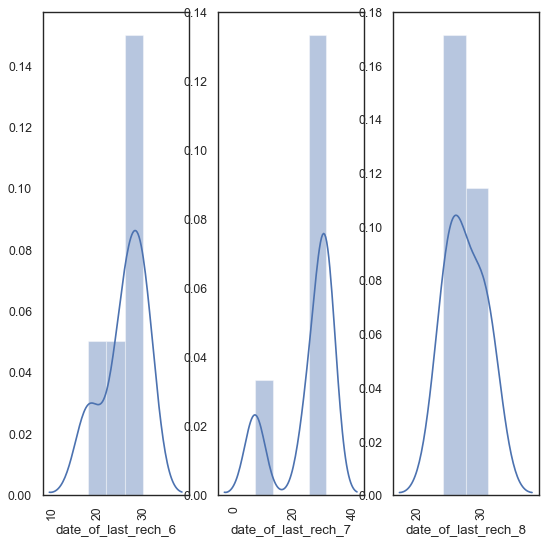

In [362]:
df_highvalue[last_rech_date].describe()
plt.figure(figsize=(8,8), edgecolor="k", dpi=80)
plt.subplot(1,3,1)
sns.distplot(df_highvalue['date_of_last_rech_6'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.distplot(df_highvalue['date_of_last_rech_7'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.distplot(df_highvalue['date_of_last_rech_8'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)

In [363]:
#Convert rech date col into categorical field indicating first half of the month (1-15th) or 2nd half(16th-end of month)
import datetime
date_mid_6 = datetime.datetime.strptime("15-06-2014", "%d-%m-%Y")
date_mid_7 = datetime.datetime.strptime("15-07-2014", "%d-%m-%Y")
date_mid_8 = datetime.datetime.strptime("15-08-2014", "%d-%m-%Y")

print(date_mid_6, date_mid_7, date_mid_8)

def populate_dt_range(dates, date_mid):
    if dates < date_mid:
        return 1
    else:
        return 0
    
df_highvalue['month_beginning_end_6'] = df_highvalue.apply(lambda x: populate_dt_range(x['date_of_last_rech_6'],date_mid_6), axis=1)
df_highvalue['month_beginning_end_7'] = df_highvalue.apply(lambda x: populate_dt_range(x['date_of_last_rech_7'],date_mid_7), axis=1)
df_highvalue['month_beginning_end_8'] = df_highvalue.apply(lambda x: populate_dt_range(x['date_of_last_rech_8'],date_mid_8), axis=1)
df_highvalue.head()

#df_highvalue['time_of_month_6'] = df_highvalue.apply(lambda x: 0 if df_highvalue['date_of_last_rech_6']<date_mid_6 else 1,axis=1)

2014-06-15 00:00:00 2014-07-15 00:00:00 2014-08-15 00:00:00


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_6_1.0,fb_7_1.0,fb_8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,month_beginning_end_6,month_beginning_end_7,month_beginning_end_8
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.0,0.0,0.0,1,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,1,1,0.0,354.0,207.0,0,0,0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.0,0.0,0.0,0,0,0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,1,1,0.0,712.0,540.0,0,0,1,0
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,1,5285.0,20424.0,455.0,0,0,0,0


In [364]:
#Drop date columns now
dt_drop_list=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
print("Shape before: ",df_highvalue.shape)
df_highvalue.drop(dt_drop_list, axis=1, inplace=True)
print("Shape after: ",df_highvalue.shape)

Shape before:  (28460, 142)
Shape after:  (28460, 139)


In [365]:
## Check class imbalance
df = df_highvalue.copy(deep=True)

In [366]:
x = df['churn'].value_counts()
display(x)
round(df['churn'].value_counts()/sum(x)*100,2)

0    26872
1     1588
Name: churn, dtype: int64

0    94.42
1     5.58
Name: churn, dtype: float64

### Plotting a few metrics to check for outliers/deviations/patterns


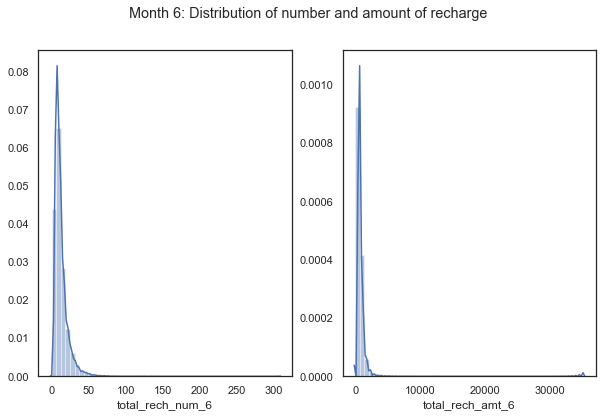

In [367]:
sns.set(style="white")
s = plt.figure(figsize=(10, 6))
s.suptitle("Month 6: Distribution of number and amount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_6'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_6'])
plt.show()

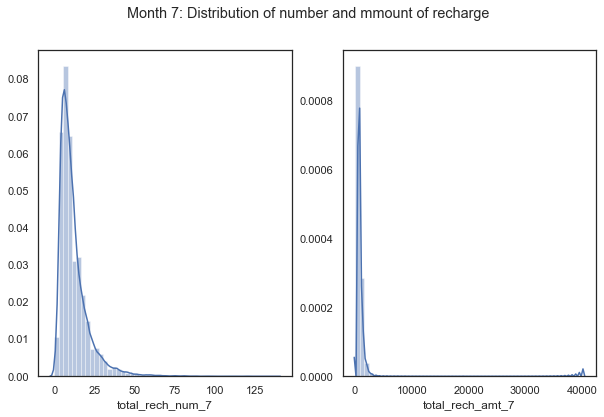

In [368]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 7: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_7'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_7'])
# plt.show()

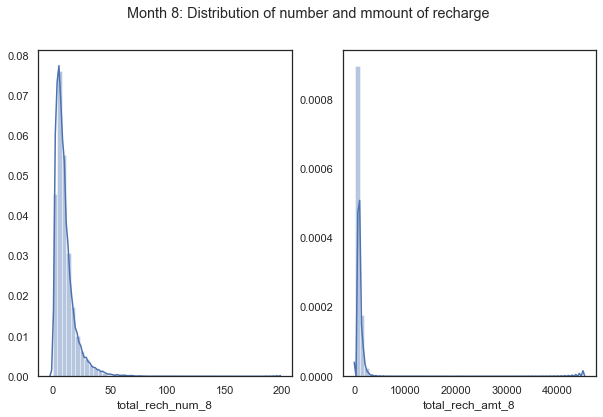

In [369]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 8: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_8'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_8'])
# plt.show()

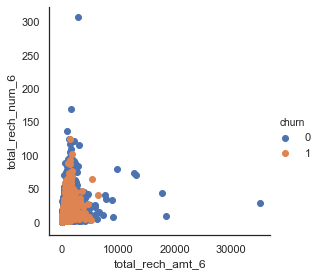

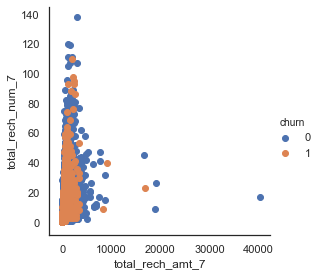

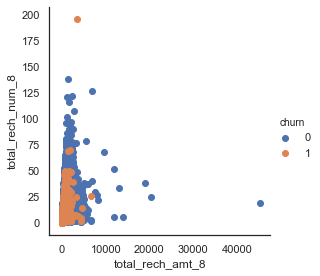

In [370]:
# sns.countplot(x='max_rech_amt_6', hue='churn',data=df)
# sns.FacetGrid(df,hue='churn',size=6).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7")

sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_6","total_rech_num_6").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_7","total_rech_num_7").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_8","total_rech_num_8").add_legend()

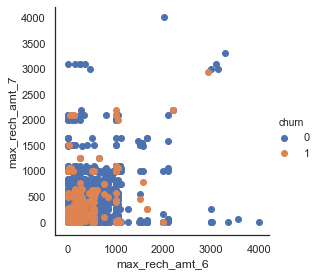

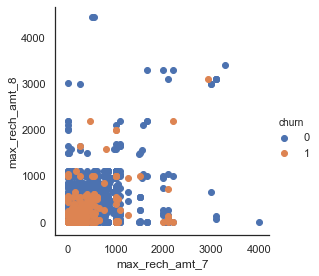

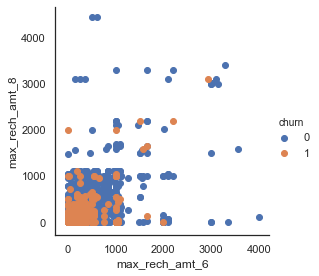

In [371]:
# sns.countplot(x='max_rech_amt_6', hue='churn',data=df)
# sns.FacetGrid(df,hue='churn',size=6).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7")

sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_6","max_rech_amt_7").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_7","max_rech_amt_8").add_legend()
sns.FacetGrid(df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_6","max_rech_amt_8").add_legend()

In [372]:
#Taking backup to CSV to check trends
#df.to_csv('telecom_hv.csv')

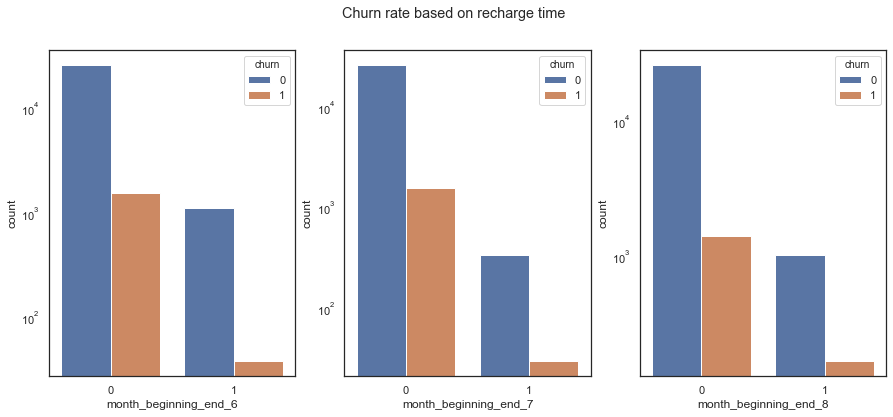

In [373]:
s=plt.figure(figsize=(15,6))
s.suptitle("Churn rate based on recharge time")
#1 -> First half of month, 0 -> Second half of month
plt.subplot(1,3,1)
sns.countplot('month_beginning_end_6',hue="churn", data=df)
plt.yscale('log')
plt.subplot(1,3,2)
sns.countplot('month_beginning_end_7',hue="churn", data=df)
plt.yscale('log')
plt.subplot(1,3,3)
sns.countplot('month_beginning_end_8',hue="churn", data=df)
plt.yscale('log')
plt.show()

In [374]:
#Combining columns from the "good" phase months i.e. _6 and _7
col_list = df.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
#Combining the good months for average
l=['night_6_1', 'night_7_1', 'fb_6_1', 'fb_7_1']
for i, col in enumerate(col_list.unique()):
    print(col)
    if col not in l:
        avg_col_name = "goodmonths_"+col
        col_6 = col+"_6"
        col_7 = col+"_7"
        df[avg_col_name] = (df[col_6]  + df[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
night_6_1
night_7_1
fb_6_1
fb_7_1
total_rech_data_amt
month_beginning_end


In [375]:
col_list = df.filter(regex='_6|_7').columns
for i, col in enumerate(col_list.unique()):
    if col not in l:
        df.drop(col, axis=1, inplace=True)
df.shape

(28460, 93)

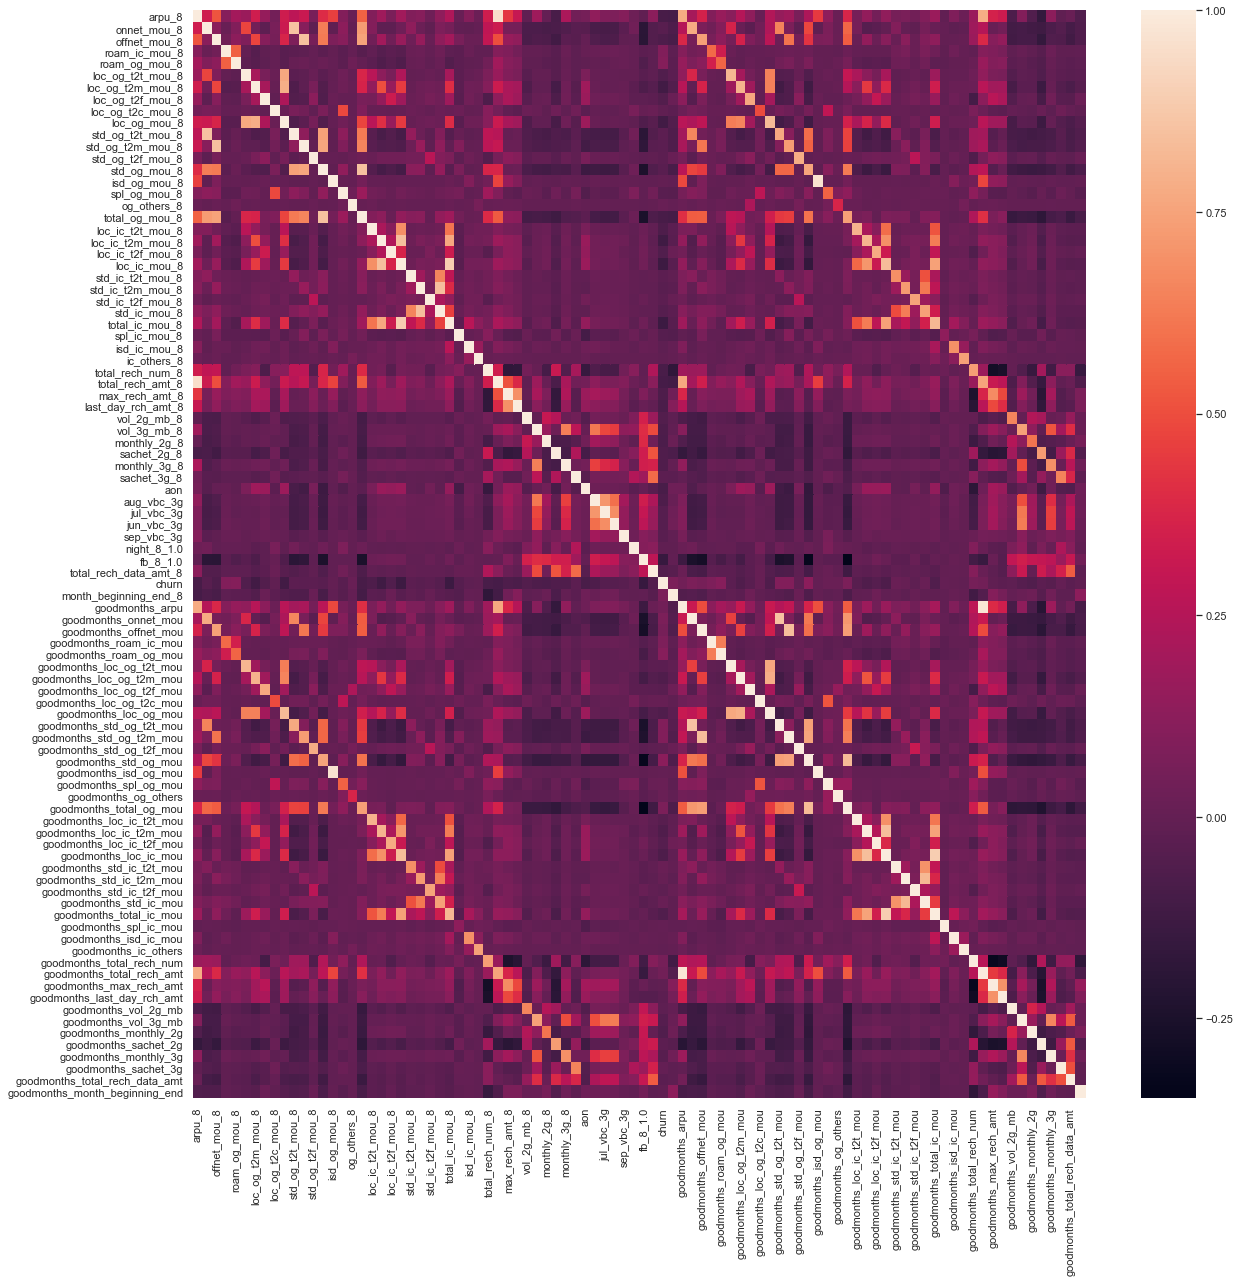

In [376]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('mobile_number',axis=1).corr())

### It is clear that there is high correlation between a lot of variables. We can see the regions grouped where correlation is high.

In [377]:
#Breaking down age on network to months from days
df['mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: mon, dtype: float64

In [378]:
def compute_years(x):
    if x<=12:
        return "<1"
    elif x<=24 and x>12:
        return "1-2"
    elif x<=60 and x>24:
        return "2-5"
    else:
        return "5+"
    
df['years_with_company'] = df.apply(lambda x: compute_years(x['mon']),axis=1)
df['years_with_company'].unique()

array(['2-5', '<1', '1-2', '5+'], dtype=object)

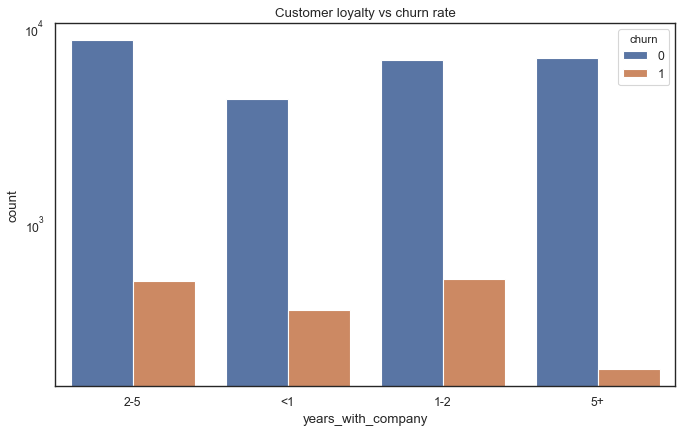

In [379]:
sns.set(style="white")
plt.figure(figsize=(10,6),edgecolor="k",facecolor="w",dpi=80)
sns.countplot(df['years_with_company'],hue=df["churn"])
plt.yscale("log")
plt.title("Customer loyalty vs churn rate")
plt.show()

### we can clearly see that churn rate is high among customers with 1-2 years and very very low once the customer has crossed 5+ years

In [380]:
df.drop('years_with_company', axis=1, inplace=True)

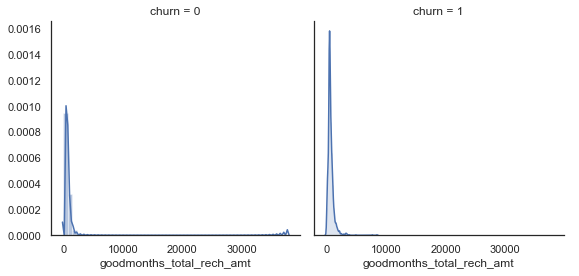

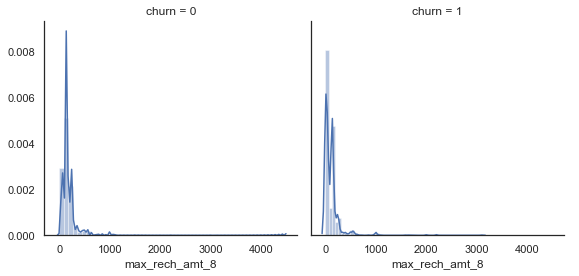

In [381]:
# sns.FacetGrid(df,hue="churn", size=4).map(sns.distplot,"max_rech_amt_6").add_legend()
# sns.FacetGrid(df,hue="churn", size=4).map(sns.distplot,"max_rech_amt_7").add_legend()
# sns.FacetGrid(df,hue="churn", size=4).map(sns.distplot,"max_rech_amt_8").add_legend()
#sns.FacetGrid(df, col="churn", size=4).map(sns.distplot, "goodmonths_rech_amt_6").add_legend()
sns.FacetGrid(df, col="churn", size=4).map(sns.distplot, "goodmonths_total_rech_amt").add_legend()
sns.FacetGrid(df, col="churn", size=4).map(sns.distplot, "max_rech_amt_8").add_legend()

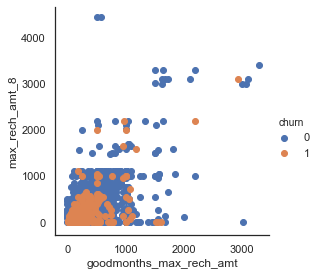

In [382]:
sns.FacetGrid(df,hue="churn",size=4).map(plt.scatter,"goodmonths_max_rech_amt",'max_rech_amt_8').add_legend()
#sns.FacetGrid(df,hue="churn",size=4).map(plt.scatter,"goodmonths_max_rech_amt",'max_rech_amt_8').add_legend()

# Checking with LogisticRegression with RFE first

In [383]:
df_lr = df.copy(deep=True)

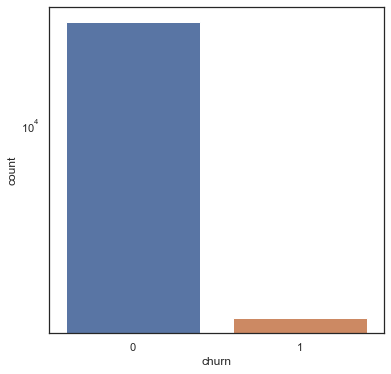

In [384]:
plt.figure(figsize=(6,6))
sns.countplot(x='churn', data=df_lr)
plt.yscale('log')
plt.show()

In [385]:
df_lr.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,25.0,178.000,375.475,0.5,0.5,0.0,0.0,177.0,0.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,...,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,24.000000
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,...,89.5,0.240,299.545,0.0,0.0,1.0,0.0,356.0,0.5,20.133333
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,...,126.0,72.405,5832.275,0.0,0.0,4.5,2.0,12854.5,0.0,44.266667


In [386]:
df_lr.drop(['mobile_number'], axis=1, inplace=True)

In [387]:
X_lr = df_lr.drop(['churn'],axis=1)
y_lr = df_lr['churn']

In [388]:
from sklearn.preprocessing import StandardScaler
scaler_lr = StandardScaler()
Xlr_scaled = scaler_lr.fit_transform(X_lr)

In [389]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(Xlr_scaled, y_lr, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19922, 91)
(8538, 91)
(19922,)
(8538,)


In [390]:
##Balancing the actual variable using oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_bal,y_bal = sm.fit_sample(X_train,y_train.ravel())

In [391]:
np.unique(y_bal,return_counts=True)

(array([0, 1]), array([18803, 18803]))

In [392]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [393]:
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe.fit(X_bal,y_bal)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [394]:
# display(df_lr.head())
# temp = pd.DataFrame(X_bal)
# temp.columns = df_lr.drop('churn', axis=1).columns
# display(temp.head())
rfe_features = df_lr.drop('churn', axis=1).columns[rfe.support_]
display(rfe_features)

Index(['loc_og_t2t_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g', 'goodmonths_onnet_mou',
       'goodmonths_offnet_mou', 'goodmonths_loc_og_t2m_mou',
       'goodmonths_std_og_mou', 'goodmonths_total_ic_mou',
       'goodmonths_total_rech_amt', 'mon'],
      dtype='object')

In [395]:
X_lr_rfe = pd.DataFrame(X_bal).iloc[:,rfe.support_]
X_lr_rfe.head()
X_lr_rfe.columns = rfe_features
X_lr_rfe.head()

,loc_og_t2t_mou_8,isd_og_mou_8,total_og_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sep_vbc_3g,goodmonths_onnet_mou,goodmonths_offnet_mou,goodmonths_loc_og_t2m_mou,goodmonths_std_og_mou,goodmonths_total_ic_mou,goodmonths_total_rech_amt,mon
0,2.005135,-0.043239,1.528589,-0.341370,0.800974,0.523287,-0.244598,0.715914,0.248868,2.043473,-0.425299,-0.336583,-0.156298,-0.053550,0.137993,1.192579,-0.616788,1.493978,0.196766,1.061352
1,-0.204083,-0.043239,-0.572575,-0.194889,-0.235117,-0.362200,2.765601,0.179167,-0.496307,2.043473,-0.035061,-0.336583,-0.156298,-0.545237,-0.591461,-0.247955,-0.616192,-0.453769,-0.764713,-0.095407
2,-0.107481,-0.043239,-0.270249,-0.341370,-0.481300,-0.514556,-0.244598,2.111456,-0.586842,-0.385109,0.745416,-0.336583,-0.156298,0.841435,-0.723849,-0.550943,0.036937,-0.584482,-0.269962,-0.573672
3,-0.239535,-0.043239,0.350575,-0.334373,-0.121422,-0.018945,-0.244598,2.433504,-0.517200,-0.385109,-0.425299,-0.336583,-0.156298,0.237195,-0.006052,-0.561477,0.569217,-0.096880,0.010268,-0.971016
4,0.431051,-0.043239,-0.504891,-0.341370,-0.601719,-0.668447,-0.244598,-0.250230,-0.308272,-0.385109,-0.425299,1.285900,-0.156298,-0.176593,-0.765843,-0.596067,-0.615843,-0.653832,-0.632329,2.197362


In [396]:
y_rfe = y_bal

In [397]:
logreg_rfe = LogisticRegression(random_state=100)
logreg_rfe.fit(X_lr_rfe,y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
X_test_rfe = pd.DataFrame(X_test).iloc[:,rfe.support_]
y_pred = logreg_rfe.predict(X_test_rfe)

In [399]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(logreg_rfe.score(X_test_rfe,y_test))
print(classification_report(y_test,y_pred))

[[6440 1629]
 [ 103  366]]
0.7971421878660108
0.7971421878660108
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8069
           1       0.18      0.78      0.30       469

    accuracy                           0.80      8538
   macro avg       0.58      0.79      0.59      8538
weighted avg       0.94      0.80      0.85      8538



## Trying out RandomForest due to high collinear data

In [400]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_bal,y_bal)
rf1_y_pred = rf1.predict(X_test)

In [401]:
print(accuracy_score(y_test,rf1_y_pred))
print(confusion_matrix(y_test,rf1_y_pred))
print(classification_report(y_test,rf1_y_pred))

0.9352307331927852
[[7760  309]
 [ 244  225]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8069
           1       0.42      0.48      0.45       469

    accuracy                           0.94      8538
   macro avg       0.70      0.72      0.71      8538
weighted avg       0.94      0.94      0.94      8538



,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
0,2.029936,0.654123,1.542673,-0.172203,-0.193781,2.005135,3.966225,-0.30892,-0.242547,3.796905,...,-0.528394,-0.419450,-0.435207,-0.466820,-0.472930,-0.377612,-0.230796,-0.391324,-0.228308,1.061352
1,-0.361492,-0.453120,-0.434023,-0.172203,-0.193781,-0.204083,-0.083249,-0.30892,-0.242547,-0.198915,...,-0.102226,-0.328757,-0.312278,0.812003,0.144974,-0.377612,0.302877,0.066858,-0.228308,-0.095407
2,-0.325123,0.068906,-0.460428,-0.172203,-0.033442,-0.107481,-0.367196,-0.30892,-0.242547,-0.320472,...,-0.748069,-0.419450,-0.435207,-0.466820,-0.472930,-0.377612,-0.230796,-0.391324,-0.228308,-0.573672
3,0.277622,0.776263,-0.285180,-0.172203,-0.193781,-0.239535,-0.027582,-0.30892,0.086197,-0.185499,...,-0.528394,-0.419450,-0.435207,-0.466820,-0.472930,-0.377612,-0.230796,-0.391324,-0.228308,-0.971016
4,-0.465618,-0.134795,-0.643148,-0.172203,-0.193781,0.431051,-0.514715,-0.30892,-0.242547,-0.075651,...,-0.440524,1.294003,-0.152966,2.090825,-0.472930,-0.377612,-0.230796,-0.267535,-0.228308,2.197362


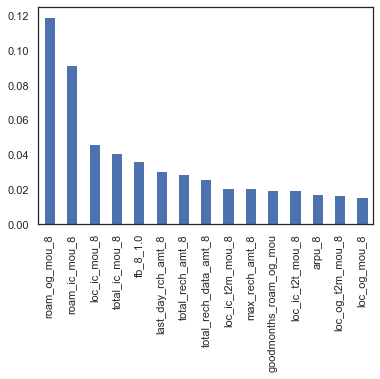

In [402]:
X = X_bal
X = pd.DataFrame(X_bal)
X.columns = df_lr.drop('churn',axis=1).columns
display(X.head())

rf1.feature_importances_.shape
importances = rf1.feature_importances_
importances.shape
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

# PCA Begins Here

In [403]:
df.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,25.0,178.000,375.475,0.5,0.5,0.0,0.0,177.0,0.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,...,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,24.000000
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,...,89.5,0.240,299.545,0.0,0.0,1.0,0.0,356.0,0.5,20.133333
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,...,126.0,72.405,5832.275,0.0,0.0,4.5,2.0,12854.5,0.0,44.266667


In [404]:
df_PCA = df.copy(deep=True)

In [405]:
df_PCA.drop('mobile_number', axis=1, inplace=True)

In [406]:
X=df_PCA.drop('churn', axis=1)
y=df_PCA['churn']

In [407]:
# Scaling variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [408]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19922, 91)
(8538, 91)
(19922,)
(8538,)


In [409]:
#Balancing dataset for classification
from imblearn.over_sampling import SMOTE

In [410]:
sm=SMOTE(random_state=100)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape)
print(y_sm.shape)

(37606, 91)
(37606,)


In [411]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [412]:
pca.fit(X_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [413]:
X_train_pca=pca.fit_transform(X_sm)
display(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
display(X_test_pca.shape)

(37606, 91)

(8538, 91)

## Applying Logistic reg on top of PCA 

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [415]:
logreg = LogisticRegression()
logreg.fit(X_train_pca,y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [416]:
y_pred = logreg.predict(X_test_pca)

In [417]:
print(confusion_matrix(y_test,y_pred))

[[6521 1548]
 [ 106  363]]


In [418]:
print(accuracy_score(y_test,y_pred))

0.8062778168189272


In [419]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8069
           1       0.19      0.77      0.31       469

    accuracy                           0.81      8538
   macro avg       0.59      0.79      0.60      8538
weighted avg       0.94      0.81      0.86      8538



In [420]:
#Checking components of PCA and applying logreg again depending on variance explained by skre plot
pca.components_

array([[ 2.10455128e-01,  1.64634205e-01,  1.90574407e-01, ...,
        -5.98956317e-02, -3.96838895e-02,  1.73034100e-02],
       [ 1.27129314e-01, -3.74964076e-02,  3.77364675e-02, ...,
         7.11796172e-02,  2.03975746e-02,  1.17703430e-01],
       [ 5.69412695e-02, -4.19233538e-02, -1.20394939e-02, ...,
        -1.20412208e-02,  7.32076308e-03,  9.99107029e-03],
       ...,
       [-8.35407368e-07, -1.30246976e-05, -1.17012414e-05, ...,
        -1.15614066e-07, -1.61253625e-07, -2.48732674e-07],
       [-3.54204787e-08, -5.32960097e-06, -5.79100742e-06, ...,
        -8.90246179e-08, -4.70377008e-08, -6.74209510e-08],
       [-8.30628871e-08, -3.13889750e-06, -3.97948601e-06, ...,
        -2.07683777e-07,  3.00686226e-08, -1.06839904e-07]])

In [421]:
pcadf=pd.DataFrame({'Feature':list(X.columns),'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcadf.head()

,Feature,PC1,PC2,PC3
0,arpu_8,0.210455,0.127129,0.056941
1,onnet_mou_8,0.164634,-0.037496,-0.041923
2,offnet_mou_8,0.190574,0.037736,-0.012039
3,roam_ic_mou_8,0.077641,-0.005318,0.459747
4,roam_og_mou_8,0.084540,-0.033590,0.337285


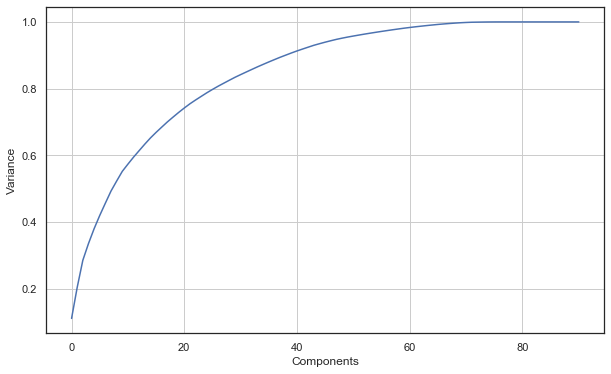

In [422]:
#Skree plot
f = plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [423]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([11.17, 20.47, 28.6 , 33.6 , 38.05, 42.03, 45.72, 49.34, 52.33,
       55.23, 57.4 , 59.5 , 61.46, 63.4 , 65.25, 66.92, 68.49, 70.04,
       71.48, 72.88, 74.21, 75.47, 76.6 , 77.68, 78.76, 79.77, 80.73,
       81.63, 82.52, 83.4 , 84.2 , 84.99, 85.77, 86.54, 87.27, 87.99,
       88.69, 89.38, 90.03, 90.67, 91.28, 91.86, 92.42, 92.98, 93.45,
       93.91, 94.34, 94.75, 95.11, 95.44, 95.74, 96.03, 96.32, 96.59,
       96.86, 97.12, 97.37, 97.62, 97.86, 98.09, 98.3 , 98.5 , 98.69,
       98.87, 99.04, 99.21, 99.35, 99.48, 99.6 , 99.71, 99.8 , 99.87,
       99.9 , 99.93, 99.95, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96])

### For variance of ~90% we get ~39 components
Hence applying logistic regression with 39 components now.

In [424]:
pca_new = PCA(n_components=39)

In [425]:
X_train_pca_new = pca_new.fit_transform(X_sm)
X_test_pca_new = pca_new.transform(X_test)
print(X_train_pca_new.shape)
print(X_test_pca_new.shape)

(37606, 39)
(8538, 39)


In [426]:
logreg_new = LogisticRegression(C=1e9) ## Setting huge C param to avoid automatic regularization.
logreg_new.fit(X_train_pca_new,y_sm)
y_pred_new = logreg_new.predict(X_test_pca_new)

In [427]:
print(confusion_matrix(y_test,y_pred_new))

[[6503 1566]
 [ 116  353]]


In [428]:
print(accuracy_score(y_test,y_pred_new))

0.8029983602717264


In [429]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8069
           1       0.19      0.77      0.31       469

    accuracy                           0.81      8538
   macro avg       0.59      0.79      0.60      8538
weighted avg       0.94      0.81      0.86      8538



In [430]:
pca_column_frame = pcadf.head(39)


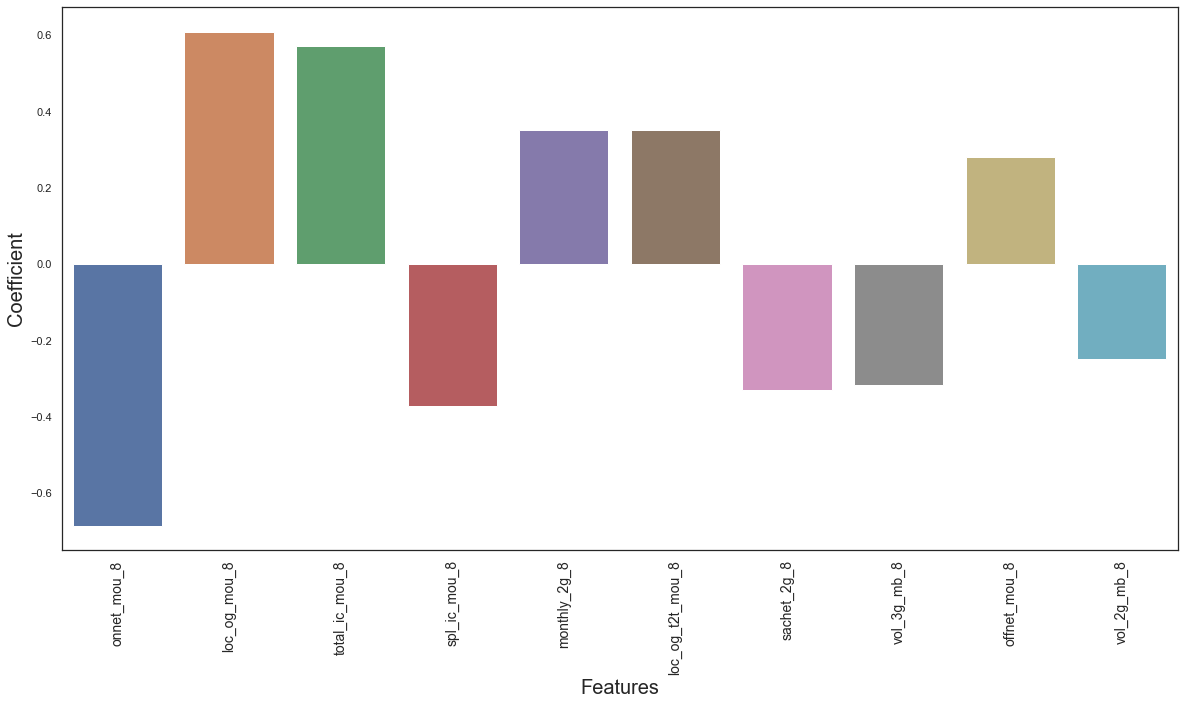

In [431]:
pca_column_frame['sampling_coeff'] = logreg_new.coef_[0]
plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

# DTree with Lasso Feature reduction

In [432]:
df_dtree = df.copy(deep=True)
df_dtree.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,25.0,178.000,375.475,0.5,0.5,0.0,0.0,177.0,0.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,...,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,24.000000
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,...,89.5,0.240,299.545,0.0,0.0,1.0,0.0,356.0,0.5,20.133333
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,...,126.0,72.405,5832.275,0.0,0.0,4.5,2.0,12854.5,0.0,44.266667


In [433]:
df_dtree.drop('mobile_number', axis=1, inplace=True)

In [434]:
X=df_dtree.drop('churn', axis=1)
y=df_dtree['churn']

In [435]:
scaler_dtree=StandardScaler().fit(X)
X_dt_scaled = scaler.transform(X)

In [436]:
X_train,X_test,y_train,y_test = train_test_split(X_dt_scaled,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19922, 91)
(8538, 91)
(19922,)
(8538,)


In [437]:
#Fixing imbalance via SMOTE
from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=100)
X_bal,y_bal=s.fit_sample(X_train,y_train)

In [438]:
np.unique(y_bal,return_counts=True)

(array([0, 1]), array([18803, 18803]))

In [439]:
#Applying lasso regression

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [440]:
lasso = LinearSVC(penalty='l1',dual=False,C=0.001).fit(X_bal,y_bal)
model = SelectFromModel(lasso,prefit=True)
X_lasso = model.transform(X_bal)

In [441]:
print(X_lasso.shape)
model.get_support(True)

(37606, 39)


array([ 3,  4,  6,  7,  9, 12, 15, 17, 20, 21, 26, 27, 30, 31, 33, 34, 35,
       36, 37, 38, 40, 43, 45, 47, 51, 52, 56, 59, 61, 65, 74, 76, 78, 79,
       82, 84, 87, 89, 90])

In [442]:
lasso_cols = df_dtree.drop('churn',axis=1).columns[model.get_support(True)]
display(lasso_cols)

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'sep_vbc_3g', 'fb_8_1.0',
       'month_beginning_end_8', 'goodmonths_roam_ic_mou',
       'goodmonths_roam_og_mou', 'goodmonths_loc_og_t2c_mou',
       'goodmonths_std_og_t2m_mou', 'goodmonths_std_og_mou',
       'goodmonths_total_og_mou', 'goodmonths_total_ic_mou',
       'goodmonths_isd_ic_mou', 'goodmonths_total_rech_num',
       'goodmonths_total_rech_amt', 'goodmonths_vol_2g_mb',
       'goodmonths_monthly_2g', 'goodmonths_sachet_3g',
       'goodmonths_month_beginning_end', 'mon'],
      dtype='object')

In [443]:
#Creating basic dtree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_lasso,y_bal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [444]:
X_test_dtree = pd.DataFrame(X_test).iloc[:,model.get_support(True)]

In [445]:
y_pred_dtree = dtree.predict(X_test_dtree)

In [446]:
print(confusion_matrix(y_test,y_pred_dtree))
print(accuracy_score(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_dtree))

[[7173  896]
 [ 176  293]]
0.874443663621457
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8069
           1       0.25      0.62      0.35       469

    accuracy                           0.87      8538
   macro avg       0.61      0.76      0.64      8538
weighted avg       0.94      0.87      0.90      8538



### Optimising hyperparams for Dtree
Params to be optimised:
i. max_depth
ii. min_samples_leaf
iii. min_samples_split

In [447]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

nfolds=5
parameters = {'max_depth':range(1,40)}
d_maxdepth = DecisionTreeClassifier(random_state=100)
mod_maxdepth = GridSearchCV(d_maxdepth, param_grid=parameters, n_jobs=-1,cv=nfolds, scoring="accuracy",return_train_score=True)
mod_maxdepth.fit(X_lasso,y_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
   

In [448]:
scores = mod_maxdepth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.341560,0.039305,0.005547,0.002329,1,{'max_depth': 1},0.791146,0.810929,0.822497,0.812259,...,0.809579,0.010177,39,0.814220,0.809240,0.806382,0.808941,0.809240,0.809605,0.002545
1,0.434483,0.053776,0.004140,0.000485,2,{'max_depth': 2},0.829035,0.836325,0.834198,0.835793,...,0.834628,0.003023,38,0.841145,0.835034,0.834369,0.833006,0.838956,0.836502,0.003050
2,0.586044,0.006716,0.003689,0.000514,3,{'max_depth': 3},0.837543,0.850818,0.860258,0.850818,...,0.850450,0.007330,37,0.856136,0.850457,0.852285,0.849094,0.851487,0.851892,0.002376
3,0.661783,0.023377,0.004390,0.001068,4,{'max_depth': 4},0.854826,0.875150,0.872224,0.873554,...,0.870340,0.007863,36,0.878573,0.872362,0.865880,0.872860,0.872927,0.872520,0.004026
4,0.778194,0.045589,0.005985,0.002873,5,{'max_depth': 5},0.858814,0.881665,0.884324,0.882861,...,0.877892,0.009587,35,0.890407,0.881602,0.879309,0.883796,0.881968,0.883416,0.003776


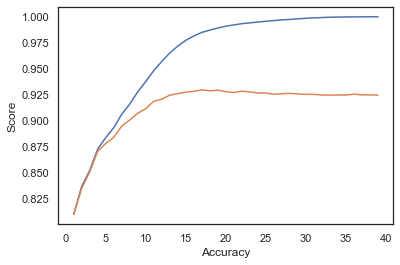

In [449]:
#Plotting test-train accuracy
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="train score")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test score")
plt.xlabel("Accuracy")
plt.ylabel("Score")
plt.show()

In [450]:
mod_maxdepth.best_params_

{'max_depth': 17}

In [451]:
#Optimizing for min_samples_leaf

nfolds=5
params={'min_samples_leaf': range(5,300,20)}
dtree_minsampleaf = DecisionTreeClassifier(random_state=100)
mod_minsamplesleaf = GridSearchCV(dtree_minsampleaf,cv=nfolds,param_grid=params,return_train_score=True,n_jobs=-1,scoring='accuracy')
mod_minsamplesleaf.fit(X_lasso,y_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': range(5, 300, 20)},
             pre

In [452]:
scores = mod_minsamplesleaf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.848563,0.089948,0.009268,0.005803,5,{'min_samples_leaf': 5},0.891518,0.924079,0.924478,0.925542,...,0.919109,0.013952,1,0.972444,0.968722,0.968257,0.969486,0.968356,0.969453,0.001557
1,2.532510,0.198187,0.005706,0.000969,25,{'min_samples_leaf': 25},0.881680,0.909454,0.913974,0.910384,...,0.904378,0.011603,2,0.931326,0.925145,0.928436,0.925046,0.926143,0.927219,0.002389
2,2.449206,0.165700,0.008014,0.004957,45,{'min_samples_leaf': 45},0.874767,0.900944,0.905864,0.901077,...,0.897251,0.011387,3,0.915969,0.913080,0.913578,0.910454,0.912282,0.913072,0.001796
3,2.163917,0.077068,0.005109,0.001339,65,{'min_samples_leaf': 65},0.872241,0.898019,0.897221,0.900013,...,0.892651,0.010297,4,0.910983,0.905867,0.902144,0.905235,0.906664,0.906179,0.002849
4,2.061541,0.086011,0.010229,0.005163,85,{'min_samples_leaf': 85},0.870513,0.896157,0.890440,0.895626,...,0.888449,0.009356,5,0.905664,0.898255,0.896659,0.897258,0.898953,0.899358,0.003251


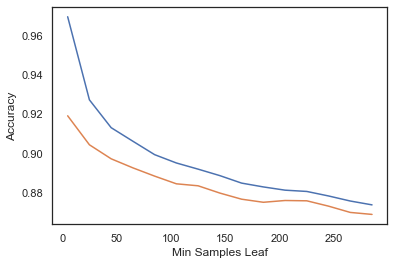

In [453]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label="training accuracy")
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label="test accuracy")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.show()

In [454]:
mod_minsamplesleaf.best_params_

{'min_samples_leaf': 5}

In [455]:
#Optimising min_samples_split
params={'min_samples_split': range(100,500,20)}
nfolds=5
dtree_splitmin = DecisionTreeClassifier(random_state=100)
mod_splitsamples = GridSearchCV(dtree_splitmin, cv=nfolds, n_jobs=-1, return_train_score=True,scoring="accuracy",param_grid=params)
mod_splitsamples.fit(X_lasso,y_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': range(100, 500, 20)},
             

In [456]:
scores = mod_splitsamples.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.587589,0.026080,0.004504,0.000888,100,{'min_samples_split': 100},0.876097,0.907060,0.912246,0.907326,...,0.902623,0.013404,1,0.938107,0.933688,0.930430,0.928403,0.931527,0.932431,0.003312
1,2.555766,0.022561,0.006366,0.003005,120,{'min_samples_split': 120},0.876761,0.906395,0.911315,0.905598,...,0.901027,0.012334,2,0.933652,0.929267,0.924447,0.925012,0.928237,0.928123,0.003319
2,2.488065,0.083489,0.006927,0.002845,140,{'min_samples_split': 140},0.873704,0.905199,0.906794,0.902805,...,0.898368,0.012413,3,0.928999,0.925345,0.922220,0.922520,0.925544,0.924926,0.002460
3,2.543917,0.093480,0.004794,0.000723,160,{'min_samples_split': 160},0.874767,0.903470,0.904534,0.902274,...,0.897464,0.011379,4,0.924811,0.922420,0.918431,0.917733,0.922021,0.921083,0.002639
4,2.534154,0.037460,0.008202,0.003119,180,{'min_samples_split': 180},0.873438,0.900013,0.903869,0.902805,...,0.895815,0.011331,5,0.921254,0.917766,0.915739,0.916104,0.919029,0.917979,0.002020


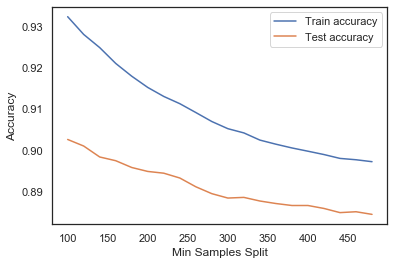

In [457]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'], label="Train accuracy")
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'], label="Test accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [458]:
mod_splitsamples.best_params_

{'min_samples_split': 100}

In [459]:
params={'min_samples_split': range(5,300,20)}
nfolds=5
d3 = DecisionTreeClassifier()
ssample = GridSearchCV(d3, cv=nfolds, n_jobs=-1, return_train_score=True,scoring="accuracy",param_grid=params)
ssample.fit(X_lasso,y_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 300, 20)},
             p

In [460]:
scores = mod_splitsamples.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.587589,0.026080,0.004504,0.000888,100,{'min_samples_split': 100},0.876097,0.907060,0.912246,0.907326,...,0.902623,0.013404,1,0.938107,0.933688,0.930430,0.928403,0.931527,0.932431,0.003312
1,2.555766,0.022561,0.006366,0.003005,120,{'min_samples_split': 120},0.876761,0.906395,0.911315,0.905598,...,0.901027,0.012334,2,0.933652,0.929267,0.924447,0.925012,0.928237,0.928123,0.003319
2,2.488065,0.083489,0.006927,0.002845,140,{'min_samples_split': 140},0.873704,0.905199,0.906794,0.902805,...,0.898368,0.012413,3,0.928999,0.925345,0.922220,0.922520,0.925544,0.924926,0.002460
3,2.543917,0.093480,0.004794,0.000723,160,{'min_samples_split': 160},0.874767,0.903470,0.904534,0.902274,...,0.897464,0.011379,4,0.924811,0.922420,0.918431,0.917733,0.922021,0.921083,0.002639
4,2.534154,0.037460,0.008202,0.003119,180,{'min_samples_split': 180},0.873438,0.900013,0.903869,0.902805,...,0.895815,0.011331,5,0.921254,0.917766,0.915739,0.916104,0.919029,0.917979,0.002020


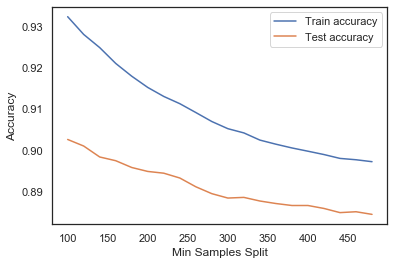

In [461]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'], label="Train accuracy")
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'], label="Test accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [462]:
ssample.best_params_

{'min_samples_split': 5}

In [463]:
#Optmising all values together to get a grid
nfolds=5
params_grid = {'max_depth':range(5,20,5),
              'min_samples_leaf': range(25,200,50),
              'min_samples_split': range(25,200,50),
              'criterion':['gini','entropy']}
dtree_grid = DecisionTreeClassifier()
grid_model = GridSearchCV(dtree_grid,cv=nfolds,param_grid=params_grid, n_jobs=-1)
grid_model.fit(X_lasso,y_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [464]:
scores = pd.DataFrame(grid_model.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.823360,0.006932,0.003605,0.000303,gini,5,25,25,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.858016,0.880202,0.884590,0.881931,0.881931,0.877334,0.009760,57
1,0.767784,0.049082,0.004293,0.001497,gini,5,25,75,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.858016,0.880202,0.884590,0.881931,0.881931,0.877334,0.009760,57
2,0.712568,0.071560,0.002979,0.000650,gini,5,25,125,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.858016,0.880202,0.884590,0.881931,0.881931,0.877334,0.009760,57
3,0.784830,0.043076,0.004497,0.001795,gini,5,25,175,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.858016,0.880202,0.884590,0.881931,0.881931,0.877334,0.009760,57
4,0.769196,0.046859,0.003639,0.000341,gini,5,75,25,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.852832,0.879005,0.881266,0.879936,0.878208,0.874249,0.010757,69


In [465]:
print(grid_model.best_estimator_)
print(grid_model.best_params_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 25}


In [466]:
#Building optimal Dtree 
dtree_optimal = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dtree_optimal.fit(X_lasso,y_bal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [467]:
dtree_optimal.score(X_test_dtree,y_test)

0.891309440149918

In [468]:
y_pred = dtree_optimal.predict(X_test_dtree)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.891309440149918
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8069
           1       0.27      0.59      0.37       469

    accuracy                           0.89      8538
   macro avg       0.62      0.75      0.66      8538
weighted avg       0.94      0.89      0.91      8538

[[7334  735]
 [ 193  276]]


,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,...,goodmonths_total_og_mou,goodmonths_total_ic_mou,goodmonths_isd_ic_mou,goodmonths_total_rech_num,goodmonths_total_rech_amt,goodmonths_vol_2g_mb,goodmonths_monthly_2g,goodmonths_sachet_3g,goodmonths_month_beginning_end,mon
0,-0.172203,-0.193781,3.966225,-0.30892,3.796905,-0.129379,-0.132775,1.528589,-0.341370,0.800974,...,0.097011,1.493978,-0.153297,0.350035,0.196766,-0.419450,-0.466820,-0.230796,-0.228308,1.061352
1,-0.172203,-0.193781,-0.083249,-0.30892,-0.198915,-0.148125,-0.329884,-0.572575,-0.194889,-0.235117,...,-0.753397,-0.453769,-0.153297,-0.054082,-0.764713,-0.328757,0.812003,0.302877,-0.228308,-0.095407
2,-0.172203,-0.033442,-0.367196,-0.30892,-0.320472,-0.148125,-0.310560,-0.270249,-0.341370,-0.481300,...,0.071613,-0.584482,-0.153297,1.735577,-0.269962,-0.419450,-0.466820,-0.230796,-0.228308,-0.573672
3,-0.172203,-0.193781,-0.027582,-0.30892,-0.185499,-0.148125,0.099602,0.350575,-0.334373,-0.121422,...,0.209667,-0.096880,-0.153297,2.774734,0.010268,-0.419450,-0.466820,-0.230796,-0.228308,-0.971016
4,-0.172203,-0.193781,-0.514715,-0.30892,-0.075651,-0.085640,-0.260316,-0.504891,-0.341370,-0.601719,...,-0.651001,-0.653832,-0.153297,-0.746853,-0.632329,1.294003,2.090825,-0.230796,-0.228308,2.197362


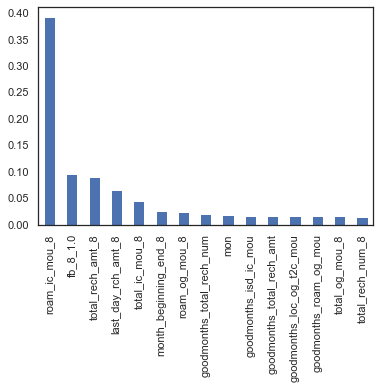

In [469]:
F = X_lasso
F = pd.DataFrame(X_lasso)
F.columns = lasso_cols
display(F.head())

#weights = pd.Series(dtree_optimal.feature_importances_)

weights = pd.Series(dtree_optimal.feature_importances_,index=F.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind='bar')

# Trying RandomForest 

In [470]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_lasso,y_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [471]:
y_pred = rf.predict(X_test_dtree)

In [472]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9330053876786133
[[7735  334]
 [ 238  231]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8069
           1       0.41      0.49      0.45       469

    accuracy                           0.93      8538
   macro avg       0.69      0.73      0.71      8538
weighted avg       0.94      0.93      0.94      8538



In [473]:
##Tuning hyperparams of RandomForest

##Tuning max_depth
# n_folds=5
# params = {'max_depth':range(2,20,5)}
# rf_md = RandomForestClassifier()
# max_depth_rfmodel = GridSearchCV(rf_md,cv=n_folds,scoring="accuracy",param_grid=params,n_jobs=-1,return_train_score=True)
# max_depth_rfmodel.fit(X_lasso,y_bal)

In [474]:
# score = max_depth_rfmodel.cv_results_
# pd.DataFrame(score).head()

In [475]:
# plt.figure()
# plt.plot(score['param_max_depth'],score['mean_train_score'],label="Train score")
# plt.plot(score['param_max_depth'],score['mean_test_score'],label="Test score")
# plt.xlabel('Max depth')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [476]:
# max_depth_rfmodel.best_params_

In [477]:
# #Checking for min_samples_split
# n_folds=5
# params={'min_samples_split':range(100,500,50)}
# rf_samplessplit=RandomForestClassifier()
# samples_split_rfmod = GridSearchCV(rf_samplessplit,cv=n_folds,param_grid=params,scoring="accuracy",return_train_score=True,n_jobs=-1)
# samples_split_rfmod.fit(X_lasso,y_bal)

In [478]:
# score = samples_split_rfmod.cv_results_
# pd.DataFrame(score).head()

In [479]:
# plt.figure()
# plt.plot(score['param_min_samples_split'],score['mean_train_score'],label="Train score")
# plt.plot(score['param_min_samples_split'],score['mean_test_score'],label="Test score")
# plt.xlabel('Min Samples Split')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [480]:
# samples_split_rfmod.best_params_

In [481]:
#Trying for param grid directly since the results from individual optimizations wont hold good
# n_folds=5
# params_grid={
#     'max_depth': range(2,20,5),
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200, 500, 200),
#     'n_estimators': [100,200, 300], 
#     'max_features': [5, 10]
# }

# rf_grid = RandomForestClassifier()
# grid_rf_model = GridSearchCV(rf_grid,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
# grid_rf_model.fit(X_lasso,y_bal)

In [482]:
# print(grid_rf_model.best_params_)
# print(grid_rf_model.best_estimator_)
# print(grid_rf_model.best_score_)

In [483]:
## Running RF with optimal estimators

rf_opt = RandomForestClassifier(max_depth=12,max_features=10,min_samples_leaf=100,min_samples_split=200,n_estimators=300)
# rf_opt = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=12, max_features=10,
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=100, min_samples_split=200,
#                        min_weight_fraction_leaf=0.0, n_estimators=200,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
rf_opt.fit(X_lasso,y_bal)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [484]:
y_pred = rf_opt.predict(X_test_dtree)

In [485]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9005621925509487
[[7377  692]
 [ 157  312]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      8069
           1       0.31      0.67      0.42       469

    accuracy                           0.90      8538
   macro avg       0.64      0.79      0.68      8538
weighted avg       0.94      0.90      0.92      8538



In [486]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.7897424426475169


In [487]:
from sklearn.metrics import roc_curve
proba = rf_opt.predict_proba(X_test_dtree)
preds = proba[:,1]

In [488]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [489]:
roc_auc = metrics.auc(fpr, tpr)

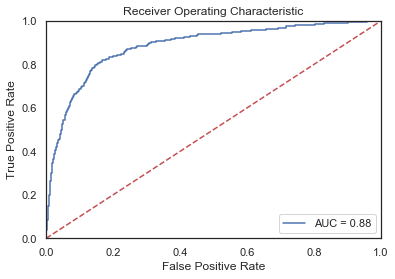

In [490]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [491]:
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

[[7377  692]
 [ 157  312]]
7377 692 157 312


,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,...,goodmonths_total_og_mou,goodmonths_total_ic_mou,goodmonths_isd_ic_mou,goodmonths_total_rech_num,goodmonths_total_rech_amt,goodmonths_vol_2g_mb,goodmonths_monthly_2g,goodmonths_sachet_3g,goodmonths_month_beginning_end,mon
0,-0.172203,-0.193781,3.966225,-0.30892,3.796905,-0.129379,-0.132775,1.528589,-0.341370,0.800974,...,0.097011,1.493978,-0.153297,0.350035,0.196766,-0.419450,-0.466820,-0.230796,-0.228308,1.061352
1,-0.172203,-0.193781,-0.083249,-0.30892,-0.198915,-0.148125,-0.329884,-0.572575,-0.194889,-0.235117,...,-0.753397,-0.453769,-0.153297,-0.054082,-0.764713,-0.328757,0.812003,0.302877,-0.228308,-0.095407
2,-0.172203,-0.033442,-0.367196,-0.30892,-0.320472,-0.148125,-0.310560,-0.270249,-0.341370,-0.481300,...,0.071613,-0.584482,-0.153297,1.735577,-0.269962,-0.419450,-0.466820,-0.230796,-0.228308,-0.573672
3,-0.172203,-0.193781,-0.027582,-0.30892,-0.185499,-0.148125,0.099602,0.350575,-0.334373,-0.121422,...,0.209667,-0.096880,-0.153297,2.774734,0.010268,-0.419450,-0.466820,-0.230796,-0.228308,-0.971016
4,-0.172203,-0.193781,-0.514715,-0.30892,-0.075651,-0.085640,-0.260316,-0.504891,-0.341370,-0.601719,...,-0.651001,-0.653832,-0.153297,-0.746853,-0.632329,1.294003,2.090825,-0.230796,-0.228308,2.197362


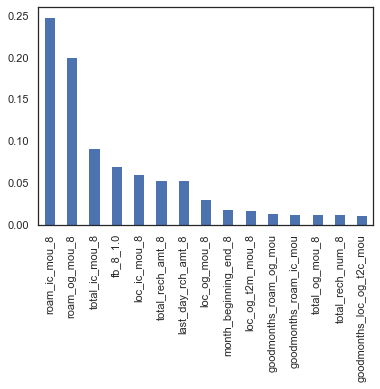

In [492]:
X = X_lasso
X = pd.DataFrame(X_lasso)
X.columns = lasso_cols
display(X.head())
importances = rf_opt.feature_importances_
importances.shape
#print(importances)
weights = pd.Series(importances,index=X.columns.values)
# print(weights.sort_values()[-10:])
# weights.sort_values()[-10:].plot(kind = 'barh')
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

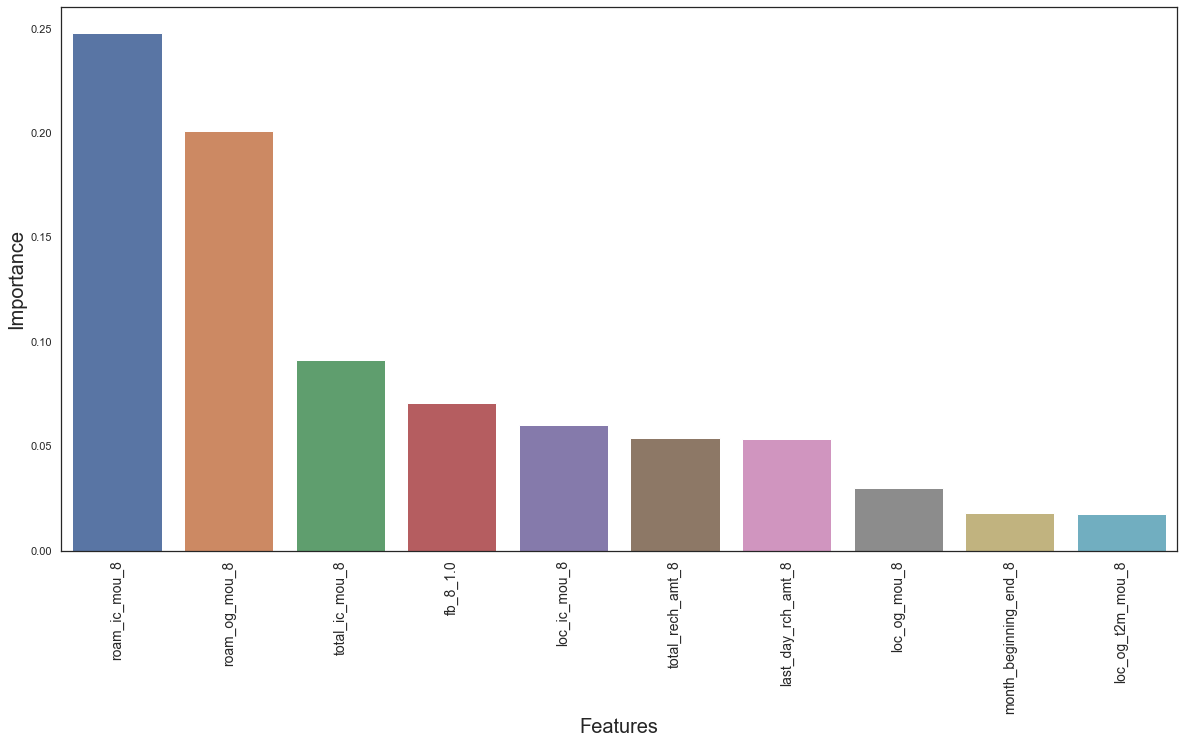

In [493]:
# testing = pd.DataFrame(pd.Series(importances,index=X.columns.values)).reset_index()
testing = pd.DataFrame(weights).reset_index()
testing.columns=['Feature','Importance']
testing.sort_values(by='Importance',ascending=False,inplace=True)

plt.figure(figsize=(20, 10))
sns.barplot(x='Feature', y='Importance', data=testing.head(10))
plt.xlabel('Features', size=20)
plt.ylabel('Importance', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

# Observations and Results:

### From the above analysis, couple of points to note:
i. Based on Lasso regulariation of data for feature selection, couple of key things to look out for are(in order of scores):
      The minutes of usage in the 8th month for both incoming and outgoing calls (including roaming,local,std)
      The number of recharges in the 8th month and the amount of recharge in the 8th month
<br/>      
ii. Focus on customers who are in between 2-4 years with the operator. These are the customers most likely to churn.
<br/>
iii. Customers who have been with the operator for 5+ years will rarely churn.
<br/>
iv. A few strategies that the telecom company can adopt are:
    To focus on customers whose number of recharges are decreasing steadily from 6th to 8th months
    To focus on customers whose recharge amount decreases steadily in 6th and 7th month and steeply in 8th month

# Appendix: Additional thoughts and trials

In [246]:
#Modeling everything with PCA
findf = df.copy(deep=True)
findf.drop('mobile_number', axis=1, inplace=True)
findf.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,25.0,178.000,375.475,0.5,0.5,0.0,0.0,177.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,...,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,...,89.5,0.240,299.545,0.0,0.0,1.0,0.0,356.0,0.5,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,...,126.0,72.405,5832.275,0.0,0.0,4.5,2.0,12854.5,0.0,44.266667


In [251]:
X=findf.drop(['churn'],axis=1)
y=findf['churn']

In [252]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X = sscaler.fit_transform(X)

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [254]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_tr,y_tr = smo.fit_sample(X_train,y_train)

In [255]:
from sklearn.decomposition import PCA
pcafinal = PCA(random_state=100)

In [256]:
pcafinal.fit(X_tr)
Xfinal_pca = pcafinal.fit_transform(X_tr)
Xtestfinal_pca = pcafinal.transform(X_test)

## Applying DTree on top of PCA

In [257]:
from sklearn.tree import DecisionTreeClassifier
dtree_pca = DecisionTreeClassifier(max_depth=5)
dtree_pca.fit(Xfinal_pca,y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [258]:
dtree_y_predfinal_pca = dtree_pca.predict(Xtestfinal_pca)

In [259]:
print(classification_report(y_test,dtree_y_predfinal_pca))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8069
           1       0.19      0.70      0.30       469

    accuracy                           0.82      8538
   macro avg       0.58      0.76      0.60      8538
weighted avg       0.94      0.82      0.86      8538



In [210]:
#Optimising dtree params according to PCA
# nfolds=5
# params_grid = {'max_depth':range(5,20,5),
#               'min_samples_leaf': range(25,200,50),
#               'min_samples_split': range(25,200,50),
#               'criterion':['gini','entropy']}
# dtree_grid_pca = DecisionTreeClassifier()
# grid_model_pca = GridSearchCV(dtree_grid_pca,cv=nfolds,param_grid=params_grid, n_jobs=-1)
# grid_model_pca.fit(Xfinal_pca,y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [211]:
# grid_model_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [260]:
dtree_optimal = DecisionTreeClassifier(max_depth=15,min_samples_leaf=25, min_samples_split=25,criterion='entropy')
dtree_optimal.fit(Xfinal_pca,y_tr)
y_pred_ftree_opt = dtree_optimal.predict(Xtestfinal_pca)

In [261]:
print(classification_report(y_test,y_pred_ftree_opt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8069
           1       0.18      0.53      0.27       469

    accuracy                           0.85      8538
   macro avg       0.58      0.70      0.59      8538
weighted avg       0.93      0.85      0.88      8538



## Trying RandomForest with PCA

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier()
rf_pca.fit(Xfinal_pca,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [263]:
y_pred_rf_pca = rf_pca.predict(Xtestfinal_pca)
print(classification_report(y_test,y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8069
           1       0.44      0.38      0.41       469

    accuracy                           0.94      8538
   macro avg       0.70      0.67      0.69      8538
weighted avg       0.94      0.94      0.94      8538



In [217]:
# #Optimising with gridsearchcv
# n_folds=5
# params_grid={
#     'max_depth': range(2,20,5),
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200, 500, 200),
#     'n_estimators': [100,200, 300], 
#     'max_features': [5, 10]
# }

# rf_grid_pca = RandomForestClassifier()
# grid_rf_model_pca = GridSearchCV(rf_grid_pca,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
# grid_rf_model_pca.fit(Xfinal_pca,y_tr)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 44.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [218]:
grid_rf_model_pca.best_params_

{'max_depth': 17,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [264]:
rf_opt_pca=RandomForestClassifier(max_depth=17, max_features=10,min_samples_leaf=100, min_samples_split=200, n_estimators=200)
rf_opt_pca.fit(Xfinal_pca,y_tr)
y_pred_final_rf_opt = rf_opt_pca.predict(Xtestfinal_pca)

In [265]:
print(classification_report(y_test,y_pred_final_rf_opt))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8069
           1       0.28      0.64      0.39       469

    accuracy                           0.89      8538
   macro avg       0.63      0.77      0.67      8538
weighted avg       0.94      0.89      0.91      8538



In [266]:
rf_opt_pca.feature_importances_.shape

(91,)

In [267]:
from sklearn.metrics import roc_curve
proba = rf_opt_pca.predict_proba(Xtestfinal_pca)
preds = proba[:,1]

In [268]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [269]:
roc_auc = metrics.auc(fpr, tpr)

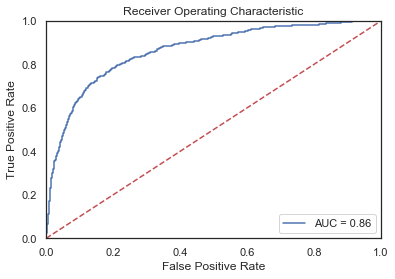

In [270]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [271]:
#Checking out LogisticRegression with RFE and manual variable selection based on statsmodel API
from sklearn.linear_model import LogisticRegression

dfl = df.copy(deep=True)
dfl.drop('mobile_number',axis=1,inplace=True)
dfl.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,25.0,178.000,375.475,0.5,0.5,0.0,0.0,177.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,...,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,...,89.5,0.240,299.545,0.0,0.0,1.0,0.0,356.0,0.5,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,...,126.0,72.405,5832.275,0.0,0.0,4.5,2.0,12854.5,0.0,44.266667


In [272]:
X = dfl.drop('churn',axis=1)
y = dfl['churn']

In [273]:
from sklearn.preprocessing import StandardScaler
scalerLogreg = StandardScaler()
X = scalerLogreg.fit_transform(X)

In [274]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [275]:
from imblearn.over_sampling import SMOTE
smoteLogreg = SMOTE(random_state=100)
X_tr,y_tr = smoteLogreg.fit_sample(X_train,y_train)

In [276]:
from sklearn.feature_selection import RFE
logregModel = LogisticRegression(C=0.001)
rfeLogreg = RFE(logregModel,20)
rfeLogreg.fit(X_tr,y_tr)

RFE(estimator=LogisticRegression(C=0.001, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [277]:
rfeLogreg.get_support()

array([False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [278]:
finalX = pd.DataFrame(X_tr).iloc[:,rfeLogreg.support_]
finalX.columns = dfl.drop('churn',axis=1).columns[rfeLogreg.support_]
finalX.head()

,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sep_vbc_3g,fb_8_1.0,goodmonths_arpu,goodmonths_total_og_mou,goodmonths_total_rech_amt,mon
0,-0.193781,3.966225,3.796905,1.528589,1.219310,0.800974,0.523287,-0.244598,0.715914,2.010277,0.248868,2.043473,-0.425299,-0.336583,-0.156298,-0.969679,0.248182,0.097011,0.196766,1.061352
1,-0.193781,-0.083249,-0.198915,-0.572575,-0.150131,-0.235117,-0.362200,2.765601,0.179167,-0.334034,-0.496307,2.043473,-0.035061,-0.336583,-0.156298,1.031269,-0.729683,-0.753397,-0.764713,-0.095407
2,-0.033442,-0.367196,-0.320472,-0.270249,-0.381796,-0.481300,-0.514556,-0.244598,2.111456,-0.389656,-0.586842,-0.385109,0.745416,-0.336583,-0.156298,-0.969679,-0.272724,0.071613,-0.269962,-0.573672
3,-0.193781,-0.027582,-0.185499,0.350575,0.111720,-0.121422,-0.018945,-0.244598,2.433504,0.248363,-0.517200,-0.385109,-0.425299,-0.336583,-0.156298,-0.969679,0.047209,0.209667,0.010268,-0.971016
4,-0.193781,-0.514715,-0.075651,-0.504891,-0.630802,-0.601719,-0.668447,-0.244598,-0.250230,-0.402744,-0.308272,-0.385109,-0.425299,1.285900,-0.156298,1.031269,-0.610542,-0.651001,-0.632329,2.197362


In [279]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
logregSM = sm.GLM(y_tr,sm.add_constant(finalX),family = sm.families.Binomial())
logregSM.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37585
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15928.
Date:                Mon, 24 Feb 2020   Deviance:                       31857.
Time:                        22:43:21   Pearson chi2:                 7.93e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6805      0.027    -62.329      0.000      -1.733      -1.628
roam_og_mou_8                 0.2329      0.017     14.088      0.000       0.200       0.265
loc_og_t2m_mou_8             -0.0916      0.065     -1.414      0.157      -0.218       0.035
loc_og_mou_8                 -0.4466      0.072     -6.225      0.000      -0.587      -0.306
total_og_mou_8               -0.6761      0.038    -17.734      0.000      -0.751      -0.601
loc_ic_t2m_mou_8              0.0981      0.100      0.977      0.328      -0.099       0.295
loc_ic_mou_8                 -0.9594      0.119     -8.038      0.000      -1.193      -0.725
total_ic_mou_8               -0.4081      0.059     -6.950      0.000      -0.523      -0.293
spl_ic_mou_8                 -0.5480      0.030    -17.994      0.000      -0.608      -0.488
total_rech_num_8             -0.2995      0.024    -12.451      0.000      -0.347      -0.252
total_rech_amt_8             -0.2376      0.048     -4.946      0.000      -0.332      -0.143
last_day_rch_amt_8           -0.3759      0.024    -15.995      0.000      -0.422      -0.330
monthly_2g_8                 -0.4979      0.029    -17.443      0.000      -0.554      -0.442
sachet_2g_8                  -0.3582      0.028    -12.916      0.000      -0.413      -0.304
monthly_3g_8                 -0.6226      0.036    -17.130      0.000      -0.694      -0.551
sep_vbc_3g                   -1.0038      0.085    -11.844      0.000      -1.170      -0.838
fb_8_1.0                     -0.2916      0.024    -12.191      0.000      -0.339      -0.245
goodmonths_arpu               0.2616      0.078      3.333      0.001       0.108       0.415
goodmonths_total_og_mou       0.3485      0.029     12.064      0.000       0.292       0.405
goodmonths_total_rech_amt     0.3170      0.077      4.132      0.000       0.167       0.467
mon                          -0.2875      0.018    -16.335      0.000      -0.322      -0.253
=============================================================================================
"""

In [281]:
def VIF_Calc(finalX):    
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(finalX.values, i) for i in range(finalX.shape[1])]
    vif["features"] = finalX.columns
    vif.sort_values(by='VIF',inplace=True,ascending=False)
    display(vif)

In [282]:
VIF_Calc(finalX)

,VIF,features
16,25.932373,goodmonths_arpu
18,24.340294,goodmonths_total_rech_amt
5,9.790467,loc_ic_mou_8
6,6.386701,total_ic_mou_8
9,5.423300,total_rech_amt_8
4,5.196707,loc_ic_t2m_mou_8
3,3.800553,total_og_mou_8
2,3.767672,loc_og_mou_8
1,3.673248,loc_og_t2m_mou_8
17,2.725415,goodmonths_total_og_mou


In [283]:
#Dropping loc_ic_t2m_mou_8 since it has the P-value above limit of 0.05
X1 = finalX.drop('loc_ic_t2m_mou_8', axis=1)
logregSM = sm.GLM(y_tr,sm.add_constant(X1), family=sm.families.Binomial())
logregSM.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37586
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15929.
Date:                Mon, 24 Feb 2020   Deviance:                       31858.
Time:                        22:44:05   Pearson chi2:                 6.70e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6790      0.027    -62.428      0.000      -1.732      -1.626
roam_og_mou_8                 0.2330      0.017     14.096      0.000       0.201       0.265
loc_og_t2m_mou_8             -0.0685      0.061     -1.128      0.259      -0.187       0.050
loc_og_mou_8                 -0.4675      0.069     -6.756      0.000      -0.603      -0.332
total_og_mou_8               -0.6770      0.038    -17.761      0.000      -0.752      -0.602
loc_ic_mou_8                 -0.8673      0.072    -11.988      0.000      -1.009      -0.725
total_ic_mou_8               -0.4071      0.059     -6.935      0.000      -0.522      -0.292
spl_ic_mou_8                 -0.5480      0.030    -17.992      0.000      -0.608      -0.488
total_rech_num_8             -0.2984      0.024    -12.419      0.000      -0.345      -0.251
total_rech_amt_8             -0.2391      0.048     -4.982      0.000      -0.333      -0.145
last_day_rch_amt_8           -0.3754      0.023    -15.980      0.000      -0.421      -0.329
monthly_2g_8                 -0.4981      0.029    -17.446      0.000      -0.554      -0.442
sachet_2g_8                  -0.3580      0.028    -12.907      0.000      -0.412      -0.304
monthly_3g_8                 -0.6221      0.036    -17.120      0.000      -0.693      -0.551
sep_vbc_3g                   -1.0033      0.085    -11.840      0.000      -1.169      -0.837
fb_8_1.0                     -0.2917      0.024    -12.192      0.000      -0.339      -0.245
goodmonths_arpu               0.2624      0.078      3.345      0.001       0.109       0.416
goodmonths_total_og_mou       0.3493      0.029     12.097      0.000       0.293       0.406
goodmonths_total_rech_amt     0.3154      0.077      4.115      0.000       0.165       0.466
mon                          -0.2881      0.018    -16.375      0.000      -0.323      -0.254
=============================================================================================
"""

In [284]:
# Dropping loc_og_t2m_mou_8
X2 = X1.drop('loc_og_t2m_mou_8', axis=1)
logregSM = sm.GLM(y_tr,sm.add_constant(X2), family=sm.families.Binomial())
logregSM.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37587
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15929.
Date:                Mon, 24 Feb 2020   Deviance:                       31859.
Time:                        22:44:15   Pearson chi2:                 5.93e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6795      0.027    -62.437      0.000      -1.732      -1.627
roam_og_mou_8                 0.2334      0.017     14.130      0.000       0.201       0.266
loc_og_mou_8                 -0.5312      0.042    -12.714      0.000      -0.613      -0.449
total_og_mou_8               -0.6772      0.038    -17.770      0.000      -0.752      -0.603
loc_ic_mou_8                 -0.8703      0.072    -12.032      0.000      -1.012      -0.729
total_ic_mou_8               -0.4069      0.059     -6.933      0.000      -0.522      -0.292
spl_ic_mou_8                 -0.5483      0.030    -18.002      0.000      -0.608      -0.489
total_rech_num_8             -0.2989      0.024    -12.443      0.000      -0.346      -0.252
total_rech_amt_8             -0.2394      0.048     -4.991      0.000      -0.333      -0.145
last_day_rch_amt_8           -0.3753      0.023    -15.981      0.000      -0.421      -0.329
monthly_2g_8                 -0.4982      0.029    -17.452      0.000      -0.554      -0.442
sachet_2g_8                  -0.3580      0.028    -12.907      0.000      -0.412      -0.304
monthly_3g_8                 -0.6220      0.036    -17.120      0.000      -0.693      -0.551
sep_vbc_3g                   -1.0028      0.085    -11.839      0.000      -1.169      -0.837
fb_8_1.0                     -0.2913      0.024    -12.175      0.000      -0.338      -0.244
goodmonths_arpu               0.2608      0.078      3.335      0.001       0.108       0.414
goodmonths_total_og_mou       0.3511      0.029     12.175      0.000       0.295       0.408
goodmonths_total_rech_amt     0.3155      0.076      4.129      0.000       0.166       0.465
mon                          -0.2889      0.018    -16.436      0.000      -0.323      -0.254
=============================================================================================
"""

In [285]:
# Since all p values are fine, checking for VIF
VIF_Calc(X2)

,VIF,features
14,25.916499,goodmonths_arpu
16,24.332885,goodmonths_total_rech_amt
3,6.639637,loc_ic_mou_8
4,6.375852,total_ic_mou_8
7,5.380492,total_rech_amt_8
2,3.787343,total_og_mou_8
15,2.724782,goodmonths_total_og_mou
13,2.477898,fb_8_1.0
1,1.973384,loc_og_mou_8
6,1.889442,total_rech_num_8


In [286]:
# Dropping loc_ic_mou_8 since it has a VIF > 5
X3 = X2.drop('goodmonths_arpu', axis=1)
logregSM = sm.GLM(y_tr,sm.add_constant(X3), family=sm.families.Binomial())
logregSM.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37588
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15935.
Date:                Mon, 24 Feb 2020   Deviance:                       31871.
Time:                        22:44:32   Pearson chi2:                 6.72e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6785      0.027    -62.391      0.000      -1.731      -1.626
roam_og_mou_8                 0.2283      0.016     13.858      0.000       0.196       0.261
loc_og_mou_8                 -0.5382      0.042    -12.915      0.000      -0.620      -0.457
total_og_mou_8               -0.7044      0.037    -18.932      0.000      -0.777      -0.632
loc_ic_mou_8                 -0.8683      0.072    -12.026      0.000      -1.010      -0.727
total_ic_mou_8               -0.4028      0.059     -6.877      0.000      -0.518      -0.288
spl_ic_mou_8                 -0.5489      0.030    -18.018      0.000      -0.609      -0.489
total_rech_num_8             -0.2943      0.024    -12.270      0.000      -0.341      -0.247
total_rech_amt_8             -0.2068      0.047     -4.408      0.000      -0.299      -0.115
last_day_rch_amt_8           -0.3835      0.023    -16.402      0.000      -0.429      -0.338
monthly_2g_8                 -0.4988      0.029    -17.483      0.000      -0.555      -0.443
sachet_2g_8                  -0.3628      0.028    -13.087      0.000      -0.417      -0.308
monthly_3g_8                 -0.6136      0.036    -16.999      0.000      -0.684      -0.543
sep_vbc_3g                   -0.9993      0.085    -11.734      0.000      -1.166      -0.832
fb_8_1.0                     -0.2902      0.024    -12.138      0.000      -0.337      -0.243
goodmonths_total_og_mou       0.3744      0.028     13.373      0.000       0.320       0.429
goodmonths_total_rech_amt     0.5447      0.033     16.291      0.000       0.479       0.610
mon                          -0.2890      0.018    -16.439      0.000      -0.323      -0.255
=============================================================================================
"""

In [287]:
VIF_Calc(X3)

,VIF,features
3,6.639448,loc_ic_mou_8
4,6.373891,total_ic_mou_8
7,5.152933,total_rech_amt_8
2,3.655097,total_og_mou_8
15,3.064112,goodmonths_total_rech_amt
14,2.559797,goodmonths_total_og_mou
13,2.476479,fb_8_1.0
1,1.973352,loc_og_mou_8
6,1.885727,total_rech_num_8
10,1.654933,sachet_2g_8


In [288]:
# Dropping total_rech_amt_8 for VIF > 5
X4 = X3.drop('loc_ic_mou_8', axis=1)
logregSM = sm.GLM(y_tr,sm.add_constant(X4), family=sm.families.Binomial())
res = logregSM.fit()
res.summary()
#logregSM.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37589
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16003.
Date:                Mon, 24 Feb 2020   Deviance:                       32007.
Time:                        22:44:43   Pearson chi2:                 1.61e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6393      0.026    -62.411      0.000      -1.691      -1.588
roam_og_mou_8                 0.2378      0.017     14.195      0.000       0.205       0.271
loc_og_mou_8                 -0.7114      0.040    -17.631      0.000      -0.791      -0.632
total_og_mou_8               -0.6945      0.037    -18.570      0.000      -0.768      -0.621
total_ic_mou_8               -1.0082      0.040    -25.242      0.000      -1.086      -0.930
spl_ic_mou_8                 -0.5420      0.030    -17.795      0.000      -0.602      -0.482
total_rech_num_8             -0.3061      0.024    -12.751      0.000      -0.353      -0.259
total_rech_amt_8             -0.1856      0.048     -3.905      0.000      -0.279      -0.092
last_day_rch_amt_8           -0.3904      0.024    -16.609      0.000      -0.437      -0.344
monthly_2g_8                 -0.5015      0.028    -17.596      0.000      -0.557      -0.446
sachet_2g_8                  -0.3620      0.028    -13.094      0.000      -0.416      -0.308
monthly_3g_8                 -0.6100      0.036    -16.932      0.000      -0.681      -0.539
sep_vbc_3g                   -1.0062      0.085    -11.792      0.000      -1.173      -0.839
fb_8_1.0                     -0.2962      0.024    -12.410      0.000      -0.343      -0.249
goodmonths_total_og_mou       0.3845      0.028     13.644      0.000       0.329       0.440
goodmonths_total_rech_amt     0.5470      0.034     16.192      0.000       0.481       0.613
mon                          -0.3024      0.018    -17.266      0.000      -0.337      -0.268
=============================================================================================
"""

In [289]:
VIF_Calc(X4)

,VIF,features
6,5.152110,total_rech_amt_8
2,3.620399,total_og_mou_8
14,3.061150,goodmonths_total_rech_amt
13,2.559251,goodmonths_total_og_mou
12,2.475789,fb_8_1.0
5,1.880041,total_rech_num_8
1,1.834570,loc_og_mou_8
9,1.654709,sachet_2g_8
3,1.572226,total_ic_mou_8
7,1.522165,last_day_rch_amt_8


In [296]:
X5 = X4.drop('total_rech_amt_8', axis=1)
logregSM = sm.GLM(y_tr,sm.add_constant(X5), family=sm.families.Binomial())
res = logregSM.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37606
Model:                            GLM   Df Residuals:                    37590
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16011.
Date:                Mon, 24 Feb 2020   Deviance:                       32022.
Time:                        22:47:48   Pearson chi2:                 5.49e+13
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6434      0.026    -62.473      0.000      -1.695      -1.592
roam_og_mou_8                 0.2164      0.016     13.685      0.000       0.185       0.247
loc_og_mou_8                 -0.7197      0.041    -17.767      0.000      -0.799      -0.640
total_og_mou_8               -0.7802      0.030    -25.687      0.000      -0.840      -0.721
total_ic_mou_8               -1.0246      0.040    -25.647      0.000      -1.103      -0.946
spl_ic_mou_8                 -0.5435      0.031    -17.811      0.000      -0.603      -0.484
total_rech_num_8             -0.3408      0.022    -15.165      0.000      -0.385      -0.297
last_day_rch_amt_8           -0.4310      0.021    -20.378      0.000      -0.472      -0.390
monthly_2g_8                 -0.5110      0.028    -18.013      0.000      -0.567      -0.455
sachet_2g_8                  -0.3624      0.028    -13.094      0.000      -0.417      -0.308
monthly_3g_8                 -0.6280      0.036    -17.611      0.000      -0.698      -0.558
sep_vbc_3g                   -1.0193      0.086    -11.907      0.000      -1.187      -0.852
fb_8_1.0                     -0.3020      0.024    -12.686      0.000      -0.349      -0.255
goodmonths_total_og_mou       0.4256      0.026     16.252      0.000       0.374       0.477
goodmonths_total_rech_amt     0.4738      0.028     16.767      0.000       0.418       0.529
mon                          -0.3022      0.018    -17.263      0.000      -0.337      -0.268
=============================================================================================
"""

In [297]:
VIF_Calc(X5)

,VIF,features
2,2.598430,total_og_mou_8
11,2.469142,fb_8_1.0
12,2.084332,goodmonths_total_og_mou
1,1.834336,loc_og_mou_8
5,1.711199,total_rech_num_8
8,1.654348,sachet_2g_8
3,1.561150,total_ic_mou_8
13,1.552421,goodmonths_total_rech_amt
7,1.477978,monthly_2g_8
9,1.454283,monthly_3g_8


In [292]:
type(X5)

pandas.core.frame.DataFrame

In [298]:
y_perd_train_SM = res.predict(sm.add_constant(X5))

In [299]:
y_perd_train_SM.describe()

count    3.760600e+04
mean     5.000000e-01
std      3.356554e-01
min      2.470240e-23
25%      1.613856e-01
50%      5.278205e-01
75%      8.319749e-01
max      1.000000e+00
dtype: float64

In [300]:
y_train_pred_final = pd.DataFrame({'Churn':y_tr.values, 'Churn_Prob':y_perd_train_SM.values.reshape(-1)})
# y_train_pred_final['MobileNumber'] = df['mobile_number']
y_train_pred_final.head()
# y_final['ChurnProb'] = y_pred_train_SM

,Churn,Churn_Prob
0,0,0.001138
1,0,0.024101
2,0,0.413506
3,0,0.293736
4,0,0.113994


In [301]:
y_train_pred_final.describe()
y_train_pred_final['Churn_Prob'].describe()
avgval = np.percentile(y_train_pred_final['Churn_Prob'],50.0)
avgval

0.5278205497198639

In [302]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.53 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.001138,0
1,0,0.024101,0
2,0,0.413506,0
3,0,0.293736,0
4,0,0.113994,0


In [303]:
print(confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted))

[[15390  3413]
 [ 3463 15340]]


In [304]:
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     18803
           1       0.82      0.82      0.82     18803

    accuracy                           0.82     37606
   macro avg       0.82      0.82      0.82     37606
weighted avg       0.82      0.82      0.82     37606



In [305]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
display(p,r,thresholds)

array([0.502123  , 0.5021097 , 0.50212311, ..., 0.5       , 0.        ,
       1.        ])

array([1.00000000e+00, 9.99946817e-01, 9.99946817e-01, ...,
       5.31830027e-05, 0.00000000e+00, 0.00000000e+00])

array([2.84032769e-05, 2.89355116e-05, 3.03838214e-05, ...,
       9.99861876e-01, 9.99865327e-01, 1.00000000e+00])

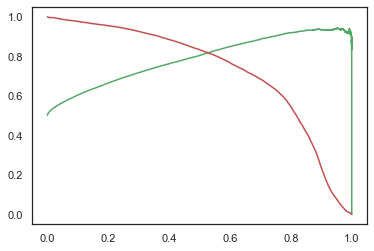

In [306]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [309]:
#Pred on test set
X5.columns
x_test_fin = pd.DataFrame(X_test)
x_test_fin.columns = dfl.drop('churn',axis=1).columns
x_test_fin.head()
X_test_fin = x_test_fin[X5.columns]
X_test_fin.head()
#x_test_fin = x_test_fin[X4.columns]
# X_test_fin = X_test[X4.columns]
# X_test_fin.head()
y_test_pred_fin = res.predict(sm.add_constant(X_test_fin))

In [310]:
type(y_test_pred_fin)

pandas.core.series.Series

In [311]:
y_pred_df = pd.DataFrame(y_test_pred_fin)
y_test_df = pd.DataFrame(y_test)

display(y_pred_df.head())
display(y_test_df.head())

,0
0,0.415616
1,0.708276
2,0.124797
3,0.124026
4,0.789422


,churn
42800,0
13276,0
20855,0
63952,0
67017,0


In [312]:
y_pred_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [313]:
y_final = pd.concat([y_test_df,y_pred_df], axis=1)
y_final.head()

,churn,0
0,0,0.415616
1,0,0.708276
2,0,0.124797
3,0,0.124026
4,0,0.789422


In [314]:
y_final = y_final.rename(columns={0:'ChurnProb'})
y_final.head()

,churn,ChurnProb
0,0,0.415616
1,0,0.708276
2,0,0.124797
3,0,0.124026
4,0,0.789422


In [315]:
y_final['final_predicted'] = y_final.ChurnProb.map(lambda x: 1 if x > 0.55 else 0)

In [316]:
metrics.accuracy_score(y_final.churn, y_final.final_predicted)

0.8278285312719607

In [317]:
print(classification_report(y_final.churn,y_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8069
           1       0.21      0.74      0.32       469

    accuracy                           0.83      8538
   macro avg       0.59      0.79      0.61      8538
weighted avg       0.94      0.83      0.87      8538



In [318]:
X5.columns

Index(['roam_og_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'fb_8_1.0',
       'goodmonths_total_og_mou', 'goodmonths_total_rech_amt', 'mon'],
      dtype='object')

# Observations and Results:

### From the above analysis, couple of points to note:
i. Based on Lasso regulariation of data for feature selection, couple of key things to look out for are(in order of scores):
      The minutes of usage in the 8th month for both incoming and outgoing calls (including roaming,local,std)
      The number of recharges in the 8th month and the amount of recharge in the 8th month
<br/>      
ii. Focus on customers who are in between 2-4 years with the operator. These are the customers most likely to churn.
<br/>
iii. Customers who have been with the operator for 5+ years will rarely churn.
<br/>
iv. A few strategies that the telecom company can adopt are:
    To focus on customers whose number of recharges are decreasing steadily from 6th to 8th months
    To focus on customers whose recharge amount decreases steadily in 6th and 7th month and steeply in 8th month